In [2]:
from sympy import symbols, Function, diff, Eq, dsolve, init_printing, pprint, lambdify
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math

### <font color="#b33939" color face="Giorgia">**🥔 The Potato Problem**</font>

A freshly boiled potato is taken out of a pot and left on the kitchen counter to cool down. The temperature of the potato at any time $(t)$ minutes after being removed is given by a function $H(t)$, measured in **degrees Celsius**.

The rate at which the potato cools is governed by the differential equation:

$$
\frac{dH}{dt} = -\frac{1}{4}(H - 27)
$$

Here, $27^\circ \text{C}$ is the constant temperature of the room.

At the moment the potato is taken out of the pot, that is, at $(t = 0)$, its temperature is $H(0) = 91^\circ \text{C}$.

### <font color="#b33939" color face="Giorgia">**You are asked to:**</font>
- [(1) Defining the instantaneous rate of change of the temperature at time $t$ - what is the implicit form of the differential equation $H'(t)$?](#1-a)
- [(2) Find the solution $H(t)$ in explicit form to differential equation](#2-original)
- [(3) Define the explicit form of the differential equation $H'(t)$](#3-a)
- [(4) Explanation of the differential equation $H'(t)$ and original equation $H(t)$](#4-a)
- [(5) Write the equation of the tangent line to the graph of $H(t)$ at $t = 0$, and use that linear approximation to estimate the temperature of the potato at $t = 3$ minutes.](#5-a)
- [(6) Use the second derivative to determine whether your answer in part (5) is an under- or overestimation of the internal temperature of potato at time t=3. Use the concavity of the function to make your explanation. Plot the second derivative function.](#6-a)
- [(7) Are there any points of inflection?](#7-a)
- [(8) What is the unnormalized accumulation function (the net change in temperature) by integration and what is the normalized accumulation function (the fraction of the total cooling that has accurred) for t = 5 and t = 10 minutes?](#8-a)
- [(9) What is the connection between first derivative and normalized accumulation function?](#9-a)
- [(10) How much time does it take to reduce the temperature from 91 °C to 27.01 °C](#10-a)
- [(11) What is the average value of the function $H(t)$ over the closed interval $0 \le x \le 35.06$](#11-a)
- [(12) What is the average rate of change (i.e. the slope of the secant line) of the function $H(t)$ over the interval $0 \le x \le 35.06$?](#12-a)
- [(13) Summarize the difference between the average rate of change (i.e. the slope of the secant line)and the average value of the function $H(t)$ over the interval $0 \le x \le 35.06$?](#13-a)
- [(14) Create the 1st to 5th Order Taylor Polynomials. Calculate the Error of Approximation. Plot All 5 Taylor Approximations and Their Errors.](#14-a)
- [(15) What is "acceptable Error"?](#15-a)
- [(16) What is considered to be acceptable error when using each order to approximate the function? and at which time does the error exceed the tolerance?](#16-a)
- [(17) Explanation of the role that curvature plays in the context of Taylor approximations and error estimates.](#17-a)
- [(18) If you can control the cooling rate (for example, by adjusting a thermostat), what is the optimal cooling strategy to reach a desired temperature in the shortest time? Determine the minimal time to reach a given target temperature and compare it with the original cooling strategy.](#18-project)


<a id="1-a"></a>
### <font color="#b33939" color face="Giorgia">**(1) Defining the instantaneous rate of change of the temperature at time $t$ - What is the implicit form of the differential equation $H'(t)$?**</font>

The **first derivative** is the instantaneous rate of change of the temperature at time $t$ (i.e. the slope of the curve at each point). In our potato cooling model, we want to define it in implicit form, meaning in terms of H(t):

In [3]:
from sympy import symbols, Function, diff, Eq, init_printing, pprint

# Initialize pretty printing for better output display (optional)
init_printing()

t = symbols('t') # Define the symbol for time
H = Function('H') # Define H as a function of t
H_t = H(t) # Define H(t)

# Compute the derivative H'(t)
derivative_H_t = diff(H_t, t)

# Create the differential equation in terms of H: H'(t) = -1/4*(H(t)-27)
eq_H_prime_H = Eq(derivative_H_t, -1/4 * (H_t - 27))
# eq_H_prime_H = Eq(derivative_H_t, -sp.Rational(1/4) * (H_t - 27))

# Print the derivative equation
pprint(eq_H_prime_H)

d                          
──(H(t)) = 6.75 - 0.25⋅H(t)
dt                         


In [4]:
print(eq_H_prime_H)

Eq(Derivative(H(t), t), 6.75 - 0.25*H(t))


So the result of instantaneous rate of change of first derivative 

$$
\frac{d}{dt}\bigl[H(t)\bigr] = 6.75 - 0.25\cdot H(t)
$$

is exactly the same as the original formulation $$
H'(t) = -\frac{1}{4}\Bigl(H(t) - 27\Bigr)
$$ The different forms are just two ways of writing the same relationship.

<a id="20-original"></a>
### <font color="#b33939" color face="Giorgia">**(2) Find the solution $H(t)$ in explicit form to differential equation**</font>

Normally, we can find the original function by apply anti-derivative directly to derivative function. However, the key issue here is that the derivative is given in terms of $H$ itself rather than directly in terms of $t$. In other words, the right-hand side of

$$
\frac{dH}{dt} = -\frac{1}{4}(H-27)
$$

depends on $H$, which is the function we're trying to find, not just on $t$. 

If you were to try to integrate directly with respect to $t$, you would face a problem because the integrand $-\frac{1}{4}(H(t)-27)$ is not solely a function of $t$; it involves $H(t)$, which is unknown. 

To find $H(t)$, we start with the differential equation

$$
\frac{dH}{dt} = -\frac{1}{4}(H-27).
$$

Since this is a separable differential equation, follow these steps:

1. **Separate the variables:**  
   To handle this, we use the method of separation of variables. This involves rearranging the equation so that all terms involving $H$ are on one side and all terms involving $t$ are on the other. Specifically, we rewrite it as:

   $$
   \frac{dH}{H-27} = -\frac{1}{4}\,dt.
   $$
   Now, each side is expressed in terms of a single variable, and you can integrate both sides accordingly.

3. **Integrate both sides:**  
   Integrate the left side with respect to $(H)$ and the right side with respect to $t$:

   $$
   \int \frac{dH}{H-27} = \int -\frac{1}{4}\,dt.
   $$

   This step-by-step approach is necessary because it allows you to "untangle" the relationship between \( H \) and \( t \) before integrating.

   The integration yields:

   $$
   \ln|H-27| = -\frac{1}{4}t + C,
   $$

   where $C$ is the constant of integration.

5. **Solve for $H(t)$:**  
   Exponentiate both sides to remove the logarithm:

   $$
   |H-27| = e^{C} e^{-\frac{1}{4}t}.
   $$

   Let $A = e^C$ (where $A > 0$). Then we can write:

   $$
   H - 27 = A e^{-\frac{1}{4}t}.
   $$

   (We drop the absolute value by incorporating the sign into the constant if needed.)

6. **Determine the constant $A$ using the initial condition:**  
   The problem gives $H(0) = 91$. Substitute $t = 0$ into the equation:

   $$
   91 - 27 = A e^0 \quad \Longrightarrow \quad 64 = A.
   $$

7. **Write the final expression for $H(t)$:**

   $$
   H(t) = 27 + 64e^{-\frac{t}{4}}.
   $$

Thus, the explicit solution for the temperature function is

$$
\boxed{H(t) = 27 + 64e^{-\frac{t}{4}}.}
$$

6. **Define Original Equation:**

In [5]:
# Differential equation in terms of H
pprint(eq_H_prime_H)

d                          
──(H(t)) = 6.75 - 0.25⋅H(t)
dt                         


In [6]:
# Dirivative:
H_t

In [7]:
from sympy import dsolve

# Solve the differential equation with the initial condition H(0) = 91
eq_H_t = dsolve(eq_H_prime_H, H_t, ics={H(0): 91})

# Display the solution
pprint(eq_H_t)

                    -0.25⋅t
H(t) = 27.0 + 64.0⋅ℯ       


In [8]:
print(eq_H_t)

Eq(H(t), 27.0 + 64.0*exp(-0.25*t))


<a id="3-a"></a>
### <font color="#b33939" color face="Giorgia">**(3) Defining the instantaneous rate of change of the temperature at time $t$ - What is the explicit form of the differential equation $H'(t)$?**</font>

The **first derivative** is the instantaneous rate of change of the temperature at time $t$ (i.e. the slope of the curve at each point). In problem $(1)$ we defined the first derivative in implicit form, meaning in terms of $(H)$. Now, we want to define the first derivative in explicit form, meaning in terms of $(t)$. In this form, we can use it to plot the function or do some calculations on it:

These derivatives actually **are** the same derivative—just written in different forms.

- **Original differential equation (in terms of \(H\)):**  
  $$
  \frac{dH}{dt} \;=\; -\frac{1}{4}\,\bigl(H-27\bigr).
  $$

- **Derived explicit form (in terms of \(t\)):**  
  $$
  \frac{dH}{dt} \;=\; -16\,e^{-\frac{t}{4}}.
  $$

When we first look at the original equation, it says the derivative depends on \(H\). But once we solve for \(H(t)\), we have:

$$
H(t) \;=\; 27 + 64\,e^{-\frac{t}{4}}.
$$

If you plug that \(H(t)\) back into

$$
\frac{dH}{dt} = -\frac{1}{4}(H - 27),
$$

you get:

$$
-\frac{1}{4}\Bigl(\Bigl[27 + 64\,e^{-\frac{t}{4}}\Bigr] - 27\Bigr)
\;=\;
-\frac{1}{4}\Bigl(64\,e^{-\frac{t}{4}}\Bigr)
\;=\;
-16\,e^{-\frac{t}{4}}.
$$


So the two forms are consistent. The expression $-\frac{1}{4}(H - 27)$ becomes $-16e^{-\frac{t}{4}}$ once $(H)$ is replaced by its solution $H(t) = 27 + 64e^{-\frac{t}{4}}.$


Find defirential equation in terms of t in explicit form:

In [9]:
# Extract the right-hand side (the expression for H(t))
H_solution = eq_H_t.rhs

# Differentiate H_solution with respect to t
H_prime_solution = diff(H_solution, t)

# Simplify the expression (optional)
eq_H_prime_t = H_prime_solution.simplify()
pprint(eq_H_prime_t)

       -0.25⋅t
-16.0⋅ℯ       


<a id="4-a"></a>
### <font color="#b33939" color face="Giorgia">**(4) Explanation of the differential equation $H'(t)$ and original equation $H(t)$**</font>

The **first derivative** is the instantaneous rate of change of the temperature at time $t$ (i.e. the slope of the curve at each point).

In our potato cooling problem, the cooling behavior of the potato is modeled by the differential equation

$$
\frac{dH}{dt} = H'(t) = -\frac{1}{4}\left(H(t) - 27\right),
$$

where:

- $H(t)$ is the internal temperature of the potato at time $t$ (in minutes).
- $H'(t) = \frac{dH}{dt}$ represents the rate of change of the temperature with respect to time.

#### Breaking Down the Equation

1. **Rate of Change and Cooling:**

   - **$H'(t)$:** This tells us how fast the temperature is changing at any time $t$.
   - **Negative Sign:** The negative sign indicates that the temperature is **decreasing** (the potato is cooling).

2. **Proportionality to the Temperature Difference:**

   - The expression $H(t) - 27$ represents the difference between the potato’s internal temperature and the ambient room temperature (27°C).
   - The equation says that the rate at which the potato cools is **proportional** to this difference. In other words, when the temperature difference is large, the potato cools faster (the slope is steeper). As the potato’s temperature gets closer to 27°C, the difference becomes smaller, and the cooling rate slows down.
   - The constant of proportionality is $\frac{1}{4}$ (written as $k = \tfrac{1}{4}$ in our equation). This constant determines how quickly the potato cools.

3. **Interpreting the Differential Equation:**

   - When $t > 0$ and if the potato’s temperature is above room temperature (i.e. $H(t) > 27$), then
     
     $$
     H(t) - 27 > 0 \quad \Rightarrow \quad H'(t) = -\frac{1}{4}\left(H(t) - 27\right) < 0.
     $$
     
     This confirms that the potato is cooling down.
     
   - The equation is an example of **Newton's Law of Cooling**, which states that the rate of cooling of an object is proportional to the difference between its temperature and the ambient temperature.

4. **Rewriting the Equation in Words:**

   - “The potato cools down at a rate that is $\frac{1}{4}$ of the difference between its current temperature and the room temperature (27°C).”
   - This means that if the potato starts very hot, the temperature difference $H(t) - 27$ is large and the cooling rate is high. As the potato cools and approaches 27°C, the difference decreases, and the cooling rate slows down.

5. **Plot Equation:**

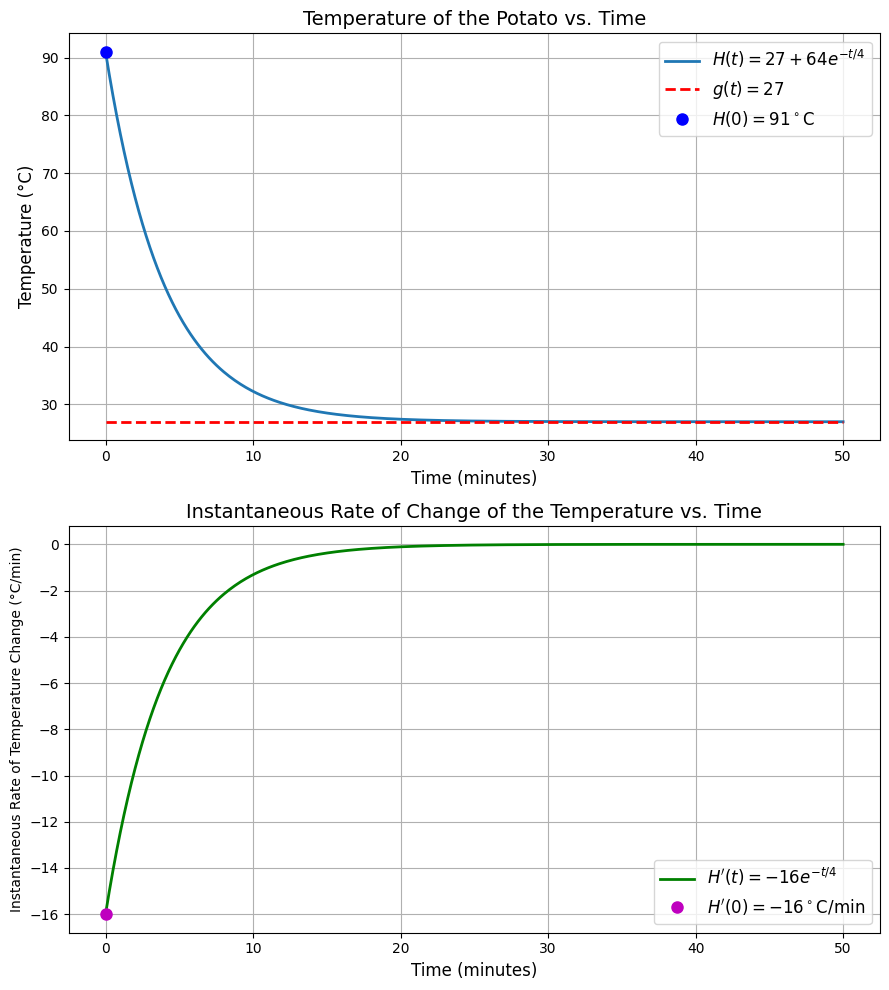

In [10]:
# Import necessary modules from sympy and other libraries
from sympy import symbols, Function, diff, Eq, dsolve, init_printing, pprint, lambdify
import numpy as np
import matplotlib.pyplot as plt

# Initialize pretty printing for better output display (optional)
init_printing()

# Define the symbol for time
t = symbols('t')  # Define the symbol for time

# Define H as a function of t
H = Function('H')  # Define H as a function of t

# Define H(t)
H_t = H(t)  # Define H(t)

# Compute the derivative H'(t)
derivative_H_t = diff(H_t, t)

# Create the differential equation in terms of H: H'(t) = -1/4*(H(t)-27)
eq_H_prime_H = Eq(derivative_H_t, -1/4 * (H_t - 27))

# Solve the differential equation with the initial condition H(0) = 91
eq_H_t = dsolve(eq_H_prime_H, H_t, ics={H(0): 91})
#pprint(eq_H_t)  # Expected: H(t) = 27 + 64*exp(-t/4)

# Extract the right-hand side (the expression for H(t))
H_solution = eq_H_t.rhs

# Differentiate H_solution with respect to t
H_prime_solution = diff(H_solution, t)

# Simplify the expression (optional)
eq_H_prime_t = H_prime_solution.simplify()
#pprint(eq_H_prime_t)  # Expected: -16*exp(-t/4)

# Convert the symbolic solution into numerical functions for plotting
H_func = lambdify(t, H_solution, 'numpy')
dHdt_func = lambdify(t, eq_H_prime_t, 'numpy')

# Create an array of time values from 0 to 50 minutes
t_vals = np.linspace(0, 50, 400)

# Evaluate H(t) for these time values
H_vals = H_func(t_vals)

# Evaluate H'(t) for these time values
dHdt_vals = dHdt_func(t_vals)

# Define the ambient temperature function g(t) = 27 (a constant function)
g_vals = 27 * np.ones_like(t_vals)

# Create subplots: one for the temperature function and one for the derivative
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 10))

# ---------------------------
# Plot 1: Temperature Function H(t) and g(t) = 27
# ---------------------------
ax1.plot(t_vals, H_vals, label=r"$H(t)=27+64e^{-t/4}$", linewidth=2)
ax1.plot(t_vals, g_vals, 'r--', label=r"$g(t)=27$", linewidth=2)

# Mark the y-axis intersection: at t=0, H(0) should be 91
ax1.plot(0, H_vals[0], 'bo', markersize=8, label=r"$H(0)=91^\circ\mathrm{C}$")

ax1.set_title("Temperature of the Potato vs. Time", fontsize=14)
ax1.set_xlabel("Time (minutes)", fontsize=12)
ax1.set_ylabel("Temperature (°C)", fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True)

# ---------------------------
# Plot 2: Derivative H'(t)
# ---------------------------
ax2.plot(t_vals, dHdt_vals, label=r"$H'(t)=-16e^{-t/4}$", color='green', linewidth=2)

# Mark the y-axis intersection for H'(t): at t=0, H'(0) = -16
ax2.plot(0, dHdt_vals[0], 'mo', markersize=8, label=r"$H'(0)=-16^\circ\mathrm{C/min}$")

ax2.set_title("Instantaneous Rate of Change of the Temperature vs. Time", fontsize=14)
ax2.set_xlabel("Time (minutes)", fontsize=12)
ax2.set_ylabel("Instantaneous Rate of Temperature Change (°C/min)", fontsize=10)
ax2.legend(fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()


#### **Explanation of the Plots' code**

- **Symbolic Definition & Differential Equation Solving:**  
  We define the time variable \(t\) and the function $H(t)$. Then, we set up the differential equation  
  $$H'(t) = -\frac{1}{4}\Bigl(H(t)-27\Bigr)$$  
  and solve it with \(H(0)=91\), obtaining the solution  
  $$H(t)=27+64e^{-t/4}.$$  
  This solution is assigned to `H_solution`.

- **Derivative Calculation:**  
  The derivative of `H_solution` is computed and simplified, giving  
  $$H'(t)=-16e^{-t/4},$$  
  which is stored in `eq_H_prime_t`.

- **Conversion & Plotting:**  
  The symbolic solutions are converted to numerical functions using `lambdify`. This allow our functions to use arrays.  
  The top plot shows $H(t)$ and the ambient temperature $g(t)=27$ with a marker at $t=0$ indicating $H(0)=91$.  
  The bottom plot shows the derivative $H'(t)=-16e^{-t/4}$ with a marker at $t=0$ indicating $H'(0)=-16$.

#### **Detailed Explanation of the Plots**

Below is a detailed explanation of what each plot shows.

##### **Top Plot: Temperature Function $H(t)$ vs. Time**

This plot displays two curves:

1. **The Temperature Function $H(t)$:**

   - **Expression:**  
     The temperature of the potato is given by  
     $$
     H(t) = 27 + 64e^{-t/4}.
     $$
     
   - **Initial Condition:**  
     At $t = 0$, the function evaluates to  
     $$
     H(0) = 27 + 64e^{0} = 27 + 64 = 91,
     $$
     which is marked on the plot with a blue dot. This is the starting temperature of the potato.
     
   - **Behavior Over Time:**  
     As time increases, the exponential term $e^{-t/4}$ decays to 0. Therefore, $H(t)$ approaches $27$. This means the potato cools down gradually until its temperature gets very close to $27^\circ\mathrm{C}$.

2. **The Ambient Temperature Line $g(t)$:**

   - **Expression:**  
     $g(t) = 27$ is a constant function representing the ambient temperature.
     
   - **Role in the Plot:**  
     The horizontal dashed line at $y = 27$ serves as an asymptote. It shows the temperature that the potato is approaching over time. Since the cooling process is modeled by Newton’s Law of Cooling, $H(t)$ will never fall below the ambient temperature; instead, it gradually approaches it.

**Interpretation of the Top Plot:**

- **Exponential Decay:**  
  The curve starts at $91^\circ\mathrm{C}$ and decreases exponentially, indicating that the potato cools rapidly at first. The steep portion of the curve corresponds to a high cooling rate when the temperature difference $H(t)-27$ is large.
  
- **Asymptotic Behavior:**  
  As $t$ increases, the curve flattens because $H(t)$ gets closer to $27$. Physically, this indicates that once the potato nears room temperature, the cooling rate slows down significantly.
  
- **Visual Markers:**  
  The blue marker at $t = 0$ confirms the initial condition $H(0) = 91^\circ\mathrm{C}$. The ambient temperature line at $y = 27$ provides a clear reference point for the final temperature that $H(t)$ approaches.

---

##### **Bottom Plot: Derivative $H'(t)$ vs. Time**

This plot shows the rate at which the potato’s temperature changes over time.

1. **The Derivative $H'(t)$:**

   - **Expression:**  
     The derivative is given by  
     $$
     H'(t) = -16e^{-t/4}.
     $$
     
   - **Initial Value:**  
     At $t = 0$, the derivative is  
     $$
     H'(0) = -16e^{0} = -16,
     $$
     which is indicated by a magenta marker on the plot.
     
   - **Behavior Over Time:**  
     As $t$ increases, $e^{-t/4}$ decays toward 0, so $H'(t)$ approaches 0. This means the cooling rate is highest at the start (a rapid decrease) and then slows over time.

**Interpretation of the Bottom Plot:**

- **Steep Initial Slope:**  
  The value $H'(0) = -16$ shows that initially the temperature is dropping at a rate of $16^\circ\mathrm{C/min}$. This steep slope corresponds to the large temperature difference at $t = 0$.
  
- **Decreasing Rate of Cooling:**  
  As time progresses, $H'(t)$ becomes less negative, reflecting that the temperature difference $H(t)-27$ is reducing—once the potato nears ambient temperature, the cooling rate slows down.
  
- **Visual Marker:**  
  The magenta marker at $t = 0$ on this plot highlights the initial cooling rate, confirming the derivative’s starting value.

---

##### **Summary of Both Plots**

- **Top Plot (Temperature vs. Time):**  
  - **Curve $H(t)=27+64e^{-t/4}$:** Represents how the potato cools exponentially from $91^\circ\mathrm{C}$ toward the ambient $27^\circ\mathrm{C}$.
  - **Line $g(t)=27$:** Indicates the constant ambient temperature that the potato is approaching.
  - **Key Feature:**  
    The graph starts at $91^\circ\mathrm{C}$ (at $t = 0$) and asymptotically approaches $27^\circ\mathrm{C}$.

- **Bottom Plot (Rate of Change vs. Time):**  
  - **Curve $H'(t)=-16e^{-t/4}$:** Displays the cooling rate starting from $-16^\circ\mathrm{C/min}$ and approaching 0 over time.
  - **Key Feature:**  
    A large negative rate initially indicates rapid cooling, which diminishes as the potato's temperature nears the ambient temperature.

These plots together provide a comprehensive visual understanding of the cooling process—illustrating both the temperature evolution and the rate at which it cools over time.


<a id="5-a"></a>
### <font color="#b33939" color face="Giorgia">**(5) Write the equation of the tangent line to the graph of $H(t)$ at $t = 0$, and use that linear approximation to estimate the temperature of the potato at $t = 3$ minutes**</font>

1. **Find the slope at $t = 0$:**

   The differential equation is

   $$
   \frac{dH}{dt} = -\frac{1}{4}(H - 27).
   $$

   At $t = 0$, we know $H(0) = 91$. Thus, the slope is

   $$
   H'(0) = -\frac{1}{4}(91 - 27) = -\frac{1}{4}(64) = -16.
   $$

2. **Write the equation of the tangent line:**

   The tangent line at $t = 0$ can be written as

   $$
   L(t) = H(0) + H'(0)t = 91 - 16t.
   $$

3. **Approximate the temperature at $t = 3$ minutes:**

   Using the tangent line, the approximate temperature is

   $$
   H(3) \approx L(3) = 91 - 16(3) = 91 - 48 = 43.
   $$

So, the equation of the tangent line is 

$$
L(t) = 91 - 16t,
$$

and the linear approximation estimates the temperature at $t = 3$ minutes to be **$43^\circ \text{C}$**.

H(0) = 91.0
H'(0) = -16.0
Tangent line: L(t) = H(0) + H'(0)t = 91 - 16t
Approximate H(3) using the tangent line: 43.0
Actual H(3): 57.23145937542494


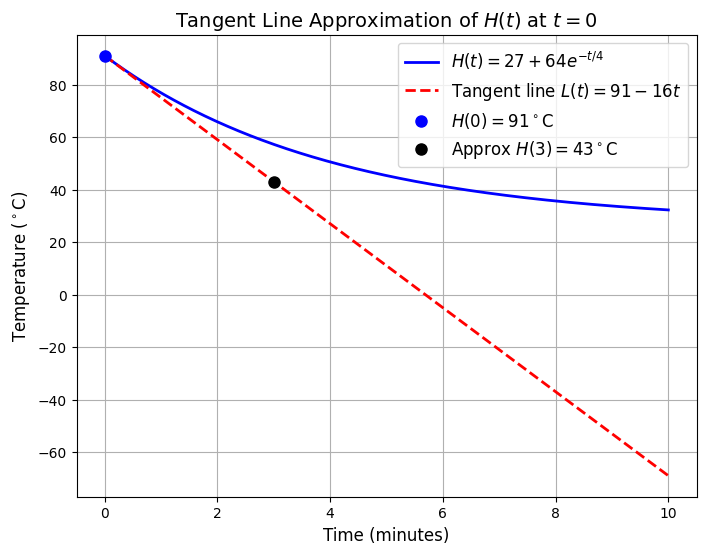

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the temperature function H(t)
def H(t):
    return 27 + 64 * np.exp(-t/4)

# Define the derivative of the temperature function H'(t)
def H_prime(t):
    return -16 * np.exp(-t/4)

# At t = 0:
H0 = H(0)           # H(0) = 27 + 64 = 91
Hprime0 = H_prime(0)  # H'(0) = -16 * exp(0) = -16

# Define the tangent line at t = 0.
# The tangent line is given by:
#   L(t) = H(0) + H'(0) * t
def L(t):
    return H0 + Hprime0 * t

# Compute the tangent line approximation at t = 3
approx_H3 = L(3)     # Expected: 91 - 16*3 = 43
actual_H3 = H(3)     # Actual H(3) using the function H(t)

print("H(0) =", H0)           # Should print 91
print("H'(0) =", Hprime0)      # Should print -16
print("Tangent line: L(t) = H(0) + H'(0)t = 91 - 16t")
print("Approximate H(3) using the tangent line:", approx_H3)
print("Actual H(3):", actual_H3)

# Plotting H(t) and the tangent line L(t)
t_vals = np.linspace(0, 10, 400)

plt.figure(figsize=(8, 6))
plt.plot(t_vals, H(t_vals), label=r"$H(t)=27+64e^{-t/4}$", linewidth=2, color='blue')
plt.plot(t_vals, L(t_vals), label=r"Tangent line $L(t)=91-16t$", 
         linewidth=2, linestyle="--", color='red')

# Mark the point at t=0 and t=3
plt.plot(0, H(0), 'bo', markersize=8, label=r"$H(0)=91^\circ\mathrm{C}$")
plt.plot(3, approx_H3, 'ko', markersize=8, label=r"Approx $H(3)=43^\circ\mathrm{C}$")

plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Temperature ($^\circ$C)", fontsize=12)
plt.title("Tangent Line Approximation of $H(t)$ at $t=0$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


<a id="6-a"></a>
### <font color="#b33939" color face="Giorgia">**(6) Use the second derivative to determine whether your answer in part $(5)$ is an under- or overestimation of the internal temperature of potato at time $t=3$. Use the concavity of the function to make your explanation.**</font>

To determine whether the linear approximation from part $(5)$ is an under- or overestimation at $t = 3$, we examine the concavity of the function $H(t) = 27 + 64e^{-t/4}$by calculating its second derivative.

#### 1. First Derivative

Starting with

$$
H(t) = 27 + 64e^{-t/4},
$$

its first derivative is

$$
H'(t) = 64 \cdot \left(-\frac{1}{4}\right)e^{-t/4} = -16e^{-t/4}.
$$

This was obtained using the chain rule, where the derivative of $e^{-t/4}$ is $-\frac{1}{4}e^{-t/4}$.

#### 2. Second Derivative

Now, differentiate $H'(t)$ with respect to $t$:

$$
H''(t) = \frac{d}{dt}\left(-16e^{-t/4}\right).
$$

Using the chain rule again, we have

$$
\frac{d}{dt}\left(e^{-t/4}\right) = -\frac{1}{4}e^{-t/4},
$$

so

$$
H''(t) = -16 \cdot \left(-\frac{1}{4}e^{-t/4}\right) = 4e^{-t/4}.
$$

#### 3. Analyzing the Sign of $H''(t)$

Notice that

$$
H''(t) = 4e^{-t/4}.
$$

Since the exponential $e^{-t/4}$ is always positive for all $t$, it follows that

$$
H''(t) > 0 \quad \text{for all } t.
$$

A positive second derivative means that the function $H(t)$ is **concave upward**.

#### 4. Implication for the Linear Approximation

For a function that is concave upward, the tangent line at the point of tangency lies *below* the actual curve (except at the point of tangency). In our case, the linear approximation (the tangent line at $t = 0$ is

$$
L(t) = 91 - 16t,
$$

which approximates $H(t)$ near $t = 0$.

Because the function is concave upward, when you move away from $t = 0$ (for instance, at $t = 3$, the true value $H(3)$ will be above the tangent line value $L(3)$.

#### 5. Conclusion

Since $H(t)$ is concave upward (as indicated by $H''(t) > 0$, the linear approximation (tangent line) underestimates the actual temperature at $t = 3$.

Thus, the answer in part $(5)$ is an **underestimation** of the internal temperature of the potato at $t = 3$ minutes.

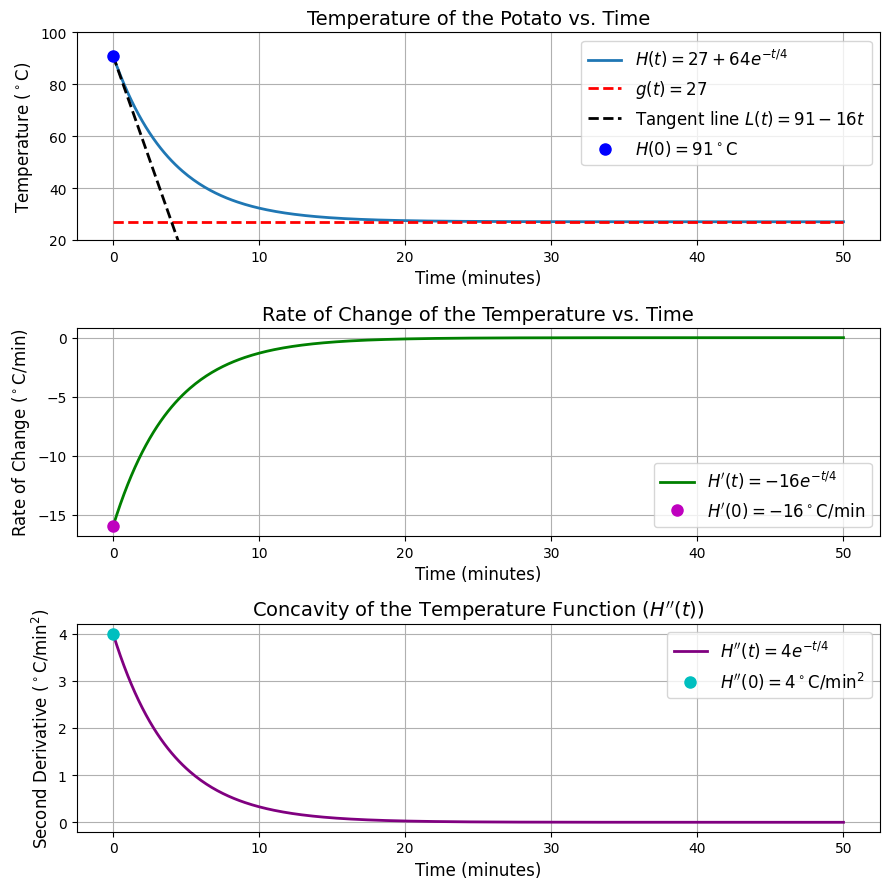

In [12]:
# Import necessary modules from sympy and other libraries
from sympy import symbols, Function, diff, Eq, dsolve, init_printing, lambdify
import numpy as np
import matplotlib.pyplot as plt

# Initialize pretty printing for better output display (optional)
init_printing()

# Define the symbol for time
t = symbols('t')  # Define the symbol for time

# Define H as a function of t
H = Function('H')  # Define H as a function of t

# Define H(t)
H_t = H(t)  # Define H(t)

# Compute the derivative H'(t)
derivative_H_t = diff(H_t, t)

# Create the differential equation: H'(t) = -1/4*(H(t)-27)
eq_H_prime_H = Eq(derivative_H_t, -1/4 * (H_t - 27))

# Solve the differential equation with the initial condition H(0) = 91
eq_H_t = dsolve(eq_H_prime_H, H_t, ics={H(0): 91})
# Uncomment the following if you want to see the solution:
# from sympy import pprint
# pprint(eq_H_t)  # Expected: H(t) = 27 + 64*exp(-t/4)

# Extract the right-hand side (the expression for H(t))
H_solution = eq_H_t.rhs

# Differentiate H_solution with respect to t to get the first derivative H'(t)
H_prime_solution = diff(H_solution, t).simplify()
# Uncomment the following if you want to see the simplified first derivative:
# pprint(H_prime_solution)  # Expected: -16*exp(-t/4)

# Compute the second derivative H''(t)
H_double_prime = diff(H_solution, t, 2).simplify()
# Uncomment to display the second derivative:
# pprint(H_double_prime)  # Expected: 4*exp(-t/4)

# Convert the symbolic solutions into numerical functions for plotting
H_func = lambdify(t, H_solution, 'numpy')
dHdt_func = lambdify(t, H_prime_solution, 'numpy')
d2Hdt2_func = lambdify(t, H_double_prime, 'numpy')

# Create an array of time values from 0 to 50 minutes
t_vals = np.linspace(0, 50, 400)

# Evaluate the functions for these time values
H_vals = H_func(t_vals)
dHdt_vals = dHdt_func(t_vals)
d2Hdt2_vals = d2Hdt2_func(t_vals)
g_vals = 27 * np.ones_like(t_vals)  # Ambient temperature function: g(t)=27

# Define the tangent line at t=0:
#   L(t) = H(0) + H'(0)*t = 91 - 16t.
H0 = H_func(0)          # H(0) = 91
Hprime0 = dHdt_func(0)  # H'(0) = -16
def L(t):
    return H0 + Hprime0 * t

# Create subplots: three charts arranged vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 9))

# ---------------------------
# Top Chart: Temperature Function H(t), g(t)=27, and Tangent Line L(t)
# ---------------------------
ax1.plot(t_vals, H_vals, label=r"$H(t)=27+64e^{-t/4}$", linewidth=2)
ax1.plot(t_vals, g_vals, 'r--', label=r"$g(t)=27$", linewidth=2)
ax1.plot(t_vals, L(t_vals), 'k--', label=r"Tangent line $L(t)=91-16t$", linewidth=2)
ax1.plot(0, H_vals[0], 'bo', markersize=8, label=r"$H(0)=91^\circ\mathrm{C}$")
ax1.set_title("Temperature of the Potato vs. Time", fontsize=14)
ax1.set_xlabel("Time (minutes)", fontsize=12)
ax1.set_ylabel("Temperature ($^\circ$C)", fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True)
ax1.set_ylim([20, 100])  # Set y-axis limits to the original scale

# ---------------------------
# Middle Chart: First Derivative H'(t)
# ---------------------------
ax2.plot(t_vals, dHdt_vals, label=r"$H'(t)=-16e^{-t/4}$", color='green', linewidth=2)
ax2.plot(0, dHdt_vals[0], 'mo', markersize=8, label=r"$H'(0)=-16^\circ\mathrm{C/min}$")
ax2.set_title("Rate of Change of the Temperature vs. Time", fontsize=14)
ax2.set_xlabel("Time (minutes)", fontsize=12)
ax2.set_ylabel("Rate of Change ($^\circ$C/min)", fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(True)

# ---------------------------
# Bottom Chart: Second Derivative H''(t)
# ---------------------------
ax3.plot(t_vals, d2Hdt2_vals, label=r"$H''(t)=4e^{-t/4}$", color='purple', linewidth=2)
ax3.plot(0, d2Hdt2_vals[0], 'co', markersize=8, label=r"$H''(0)=4^\circ\mathrm{C/min^2}$")
ax3.set_title("Concavity of the Temperature Function ($H''(t)$)", fontsize=14)
ax3.set_xlabel("Time (minutes)", fontsize=12)
ax3.set_ylabel("Second Derivative ($^\circ$C/min$^2$)", fontsize=12)
ax3.legend(fontsize=12)
ax3.grid(True)

plt.tight_layout()
plt.show()


$H(t)$ is concave upward over its entire domain—even though the graph eventually flattens as it asymptotically approaches 27. Here’s why:

- **Definition of Concavity:**  
  A function is concave upward on an interval if its second derivative is positive throughout that interval. For our function,  
  $$H(t)=27+64e^{-t/4},$$
  the second derivative is  
  $$H''(t)=4e^{-t/4}.$$
  
  Since $e^{-t/4}$ is always positive for all $t$, we have  
  $$H''(t)>0 \quad \text{for all } t.$$

  
  This means $H(t)$ is concave upward everywhere—even if the effect is more pronounced at the beginning.

- **Graph Behavior:**  
  Although the graph flattens out as $t$ increases (because $H(t)$ asymptotically approaches 27 and $H'(t)$ approaches 0), the curvature (as measured by $H''(t)$ remains positive. In practical terms, while the graph becomes nearly horizontal at large $t$, it still lies above any of its tangent lines. This is the hallmark of a concave upward function.

So, even if the flattening (or diminishing rate of change) might make the upward concavity less visually dramatic for large values of $t$, the function remains concave upward because the second derivative is always positive.

---

The notation

$$
H''(0) = 4 \quad \text{(in units } ^\circ\mathrm{C/min}^2\text{)}
$$

means that at $t=0$, the second derivative of the temperature function $H(t)$ is 4, with units of degrees Celsius per minute squared. Here’s what that tells you:

- **Rate of Change of the Cooling Rate:**  
  The second derivative $H''(t)$ represents how quickly the first derivative $H'(t)$ (the cooling rate) is changing. At $t=0$, $H''(0) = 4$ means that the cooling rate is increasing by $4^\circ\mathrm{C/min}$ for each minute elapsed. (Since the first derivative $H'(t)$ is negative, saying it "increases" means it becomes less negative as time goes on.)

- **Concavity:**  
  A positive second derivative indicates that the function $H(t)$ is concave upward. For the potato cooling problem, this tells you that at the start ($t=0$), the graph of $H(t)$ is bending upward, meaning that the tangent line at $t=0$ will lie below the actual curve.

- **Units Explained:**  
  The unit $^\circ\mathrm{C/min}^2$ means that if you change the time by 1 minute, the cooling rate (measured in $^\circ\mathrm{C/min}$) would change by approximately $4^\circ\mathrm{C/min}$ at $t=0$.

In summary, $H''(0) = 4\,^\circ\mathrm{C/min}^2$ indicates that at the very start of the cooling process, the temperature’s rate of change (the cooling rate) is increasing at a rate of $4^\circ\mathrm{C}$ per minute per minute, and it confirms that the temperature function is concave upward at $t = 0$.

---

$H''(t)=4e^{-t/4}$ is always positive. This confirms that the temperature function $H(t)$ is concave upward. $H'(t)$ (slope) is increasing or $H'(t)$ (slope) becomes less negative. This means if the $H'(t)$ (slope) becomes less and less negative, so when we approach temperature at t=3 using equation of tangent line the slope shows that it is very negative, when in reality it shows it is getting less and less negative. So this means we are underestimated in part $(5)$. Consequently, the tangent line (which touches the function at \(t=0\)) lies below the curve for \(t>0\), meaning the linear approximation underestimates the true temperature at later times.

In general, when $H''(t)$ is positive and $H'(t)$ is increasing (doesn't matter if $H'(t)$ is negative or positive), as long as $H'(t)$ is increasing the $H(t)$ is concave upwards.

<a id="7-a"></a>
### <font color="#b33939" color face="Giorgia">**(7) Are there any points of inflection?**</font>

A point of inflection is where the concavity of a function changes—that is, where the second derivative either changes sign or is zero (with a sign change). For the potato cooling function

$$
H(t)=27+64e^{-t/4},
$$

we computed the second derivative as

$$
H''(t)=4e^{-t/4}.
$$

Since the exponential function $e^{-t/4}$ is always positive for all $t$, it follows that

$$
H''(t)=4e^{-t/4}>0 \quad \text{for all } t.
$$

Because the second derivative is strictly positive everywhere, the function is concave upward throughout its domain. There is no change in concavity, and hence there are **no points of inflection** for $H(t)$.

<a id="8-a"></a>
### <font color="#b33939" color face="Giorgia">**(8) What is the unnormalized accumulation function (the net change in temperature) by integration and what is the normalized accumulation function (the fraction of the total cooling that has accurred) for t = 5 and t = 10 minutes?**</font>

In problems like this one—where a rate of change is proportional to the difference between the current value and some equilibrium value—we often think about the accumulated effect of that rate. In this context, the "accumulation function" can be interpreted in two useful ways:

---

#### **1. The Unnormalized Accumulation Function**

If we start with the differential equation

$$
\frac{dH}{dt} = -\frac{1}{4}\bigl(H-27\bigr),
$$

and solve it (by separation of variables), we obtain

$$
H(t) = 27 + 64e^{-t/4}.
$$

Since the initial temperature is

$$
H(0) = 27 + 64 = 91,
$$

the net change in temperature (i.e., the accumulation of change) from time $t = 0$ to $t$ is

$$
\Delta H(t) = H(t) - H(0) = \bigl[27 + 64e^{-t/4}\bigr] - 91 = 64\bigl(e^{-t/4} - 1\bigr).
$$

**Alternative Method:**  
Instead of computing the difference directly, we can also obtain $\Delta H(t)$ by integrating the derivative over the interval $[0,t]$. Since

$$
H'(t) = -16e^{-t/4},
$$

by the Fundamental Theorem of Calculus,

$$
\Delta H(t) = \int_{0}^{t} H'(s)\,ds.
$$

Carrying out the integration yields

$$
\int_{0}^{t} -16e^{-s/4}\,ds = 64\Bigl(e^{-t/4} - 1\Bigr),
$$

which is equivalent to the expression for $\Delta H(t)$ obtained above.

---

#### **2. The Normalized (Fractional) Accumulation Function**

Sometimes, it is useful to express the accumulated change as a fraction of the total possible change—from the initial temperature $H(0)$ to the equilibrium (room) temperature. Here, the total change is

$$
H(0) - 27 = 91 - 27 = 64.
$$

We then define the normalized accumulation function as

$$
\frac{H(0) - H(t)}{H(0) - 27}.
$$

Substitute the expression for $H(t)$:

$$
\begin{aligned}
\frac{H(0) - H(t)}{H(0) - 27} 
&= \frac{91 - \bigl[27 + 64e^{-t/4}\bigr]}{64} \\
&= \frac{91 - 27 - 64e^{-t/4}}{64} \\
&= \frac{64 - 64e^{-t/4}}{64} \\
&= 1 - e^{-t/4}.
\end{aligned}
$$

This function $1 - e^{-t/4}$ satisfies:
- $1 - e^{-t/4} = 0$ at $t = 0$ (no change at $t = 0$), and 
- $1 - e^{-t/4} \to 1$ as $t \to \infty$ (the potato eventually cools completely to $27^\circ\mathrm{C}$).

---

#### **Summary**

- **Unnormalized Accumulation (Net Change):**  
  The accumulated change in temperature is

  $$
  \Delta H(t) = H(t) - H(0) = 64\left(e^{-t/4} - 1\right).
  $$

  This can be computed directly as the difference or, alternatively, by integrating the derivative:

  $$
  \Delta H(t) = \int_{0}^{t} H'(s)\,ds.
  $$

- **Normalized Accumulation (Fraction of Total Cooling):**  
  The fraction of the total cooling that has occurred is

  $$
  \frac{H(0) - H(t)}{H(0) - 27} = 1 - e^{-t/4}.
  $$

Both forms are useful depending on whether you wish to know the absolute change in temperature (in degrees Celsius) or the relative progress toward equilibrium.

===========================================================================================================================================

#### **Calculate the unnormalized and the normalized accumulation for t = 5 and t = 10 minutes:**

Below are two concrete examples—one using the **unnormalized accumulation** function (the net change in temperature) and the other using the **normalized accumulation** function (the fraction of the total cooling that has occurred)—to help clarify these concepts in the context of potato cooling.

Recall that the cooling model is given by

$$
H(t) = 27 + 64e^{-t/4},
$$

with the initial temperature

$$
H(0) = 27 + 64 = 91.
$$

Thus, the total possible drop in temperature is

$$
H(0) - 27 = 91 - 27 = 64^\circ\mathrm{C}.
$$

We can interpret the accumulated effect of cooling in two ways:

---

#### **1. Unnormalized Accumulation Function (Net Change in Temperature)**

The **unnormalized accumulation function** (or net change) gives the actual change in temperature (in °C) from time $t=0$ to time $t$. It is defined as

$$
\Delta H(t) = H(t) - H(0).
$$

Substitute the expression for $H(t)$:

$$
\Delta H(t) = \Bigl[27 + 64e^{-t/4}\Bigr] - 91 = 64\bigl(e^{-t/4} - 1\bigr).
$$

#### **Example 1: For $t = 5$ minutes**

1. **Compute the net change:**

   $$
   \Delta H(5) = 64\bigl(e^{-5/4} - 1\bigr).
   $$

   Since

   $$
   e^{-5/4} = e^{-1.25} \approx 0.2865,
   $$

   we have

   $$
   \Delta H(5) \approx 64(0.2865 - 1) = 64(-0.7135) \approx -45.66.
   $$

2. **Interpretation:**
   - The negative value indicates a drop in temperature.
   - The potato’s temperature decreases by about $45.66^\circ\mathrm{C}$ in 5 minutes.
   - The actual temperature at 5 minutes is

     $$
     H(5) = H(0) + \Delta H(5) \approx 91 - 45.66 \approx 45.34^\circ\mathrm{C}.
     $$

#### **Example 2: For $t = 10$ minutes**

1. **Compute the net change:**

   $$
   \Delta H(10) = 64\bigl(e^{-10/4} - 1\bigr) = 64\bigl(e^{-2.5} - 1\bigr).
   $$

   Since

   $$
   e^{-2.5} \approx 0.0821,
   $$

   we have

   $$
   \Delta H(10) \approx 64(0.0821 - 1) = 64(-0.9179) \approx -58.75.
   $$

2. **Interpretation:**
   - The potato cools by about $58.75^\circ\mathrm{C}$ in 10 minutes.
   - The temperature at 10 minutes is

     $$
     H(10) = 91 + \Delta H(10) \approx 91 - 58.75 \approx 32.25^\circ\mathrm{C}.
     $$

---

#### **2. Normalized Accumulation Function (Fraction of Total Cooling)**

The **normalized accumulation function** expresses the fraction of the total cooling that has occurred by time $t$. The total cooling available is $64^\circ\mathrm{C}$ (from $91^\circ\mathrm{C}$ to $27^\circ\mathrm{C}$). We define

$$
F(t) = \frac{H(0)-H(t)}{H(0)-27}.
$$

Substitute $H(t)$:

$$
\begin{aligned}
F(t) &= \frac{91 - \bigl[27+64e^{-t/4}\bigr]}{64} \\
     &= \frac{91 - 27 - 64e^{-t/4}}{64} \\
     &= \frac{64-64e^{-t/4}}{64} \\
     &= 1 - e^{-t/4}.
\end{aligned}
$$

#### **Example 1: For $t = 5$ minutes**

1. **Compute the fraction:**

   $$
   F(5) = 1 - e^{-5/4} \approx 1 - 0.2865 \approx 0.7135.
   $$

2. **Interpretation:**
   - About $71.35\%$ of the total cooling has occurred in 5 minutes.

#### **Example 2: For $t = 10$ minutes**

1. **Compute the fraction:**

   $$
   F(10) = 1 - e^{-10/4} = 1 - e^{-2.5} \approx 1 - 0.0821 \approx 0.9179.
   $$

2. **Interpretation:**
   - Approximately $91.8\%$ of the total cooling has occurred after 10 minutes.

---

#### **Summary**

- **Unnormalized Accumulation Function:**

  The net temperature change is

  $$
  \Delta H(t) = 64\left(e^{-t/4}-1\right).
  $$

  For example, after 5 minutes the temperature has dropped by about $45.66^\circ\mathrm{C}$, and after 10 minutes by about $58.75^\circ\mathrm{C}$.

- **Normalized Accumulation Function:**

  The fraction of the total cooling that has occurred is

  $$
  F(t) = 1 - e^{-t/4}.
  $$

  For instance, after 5 minutes roughly $71.35\%$ of the total cooling (64°C) is completed, and after 10 minutes approximately $91.8\%$ is completed.

These two accumulation functions provide two perspectives:
- The **unnormalized accumulation** tells you the absolute change in temperature (in °C).
- The **normalized accumulation** tells you how far along the cooling process is, as a fraction of the total possible change.


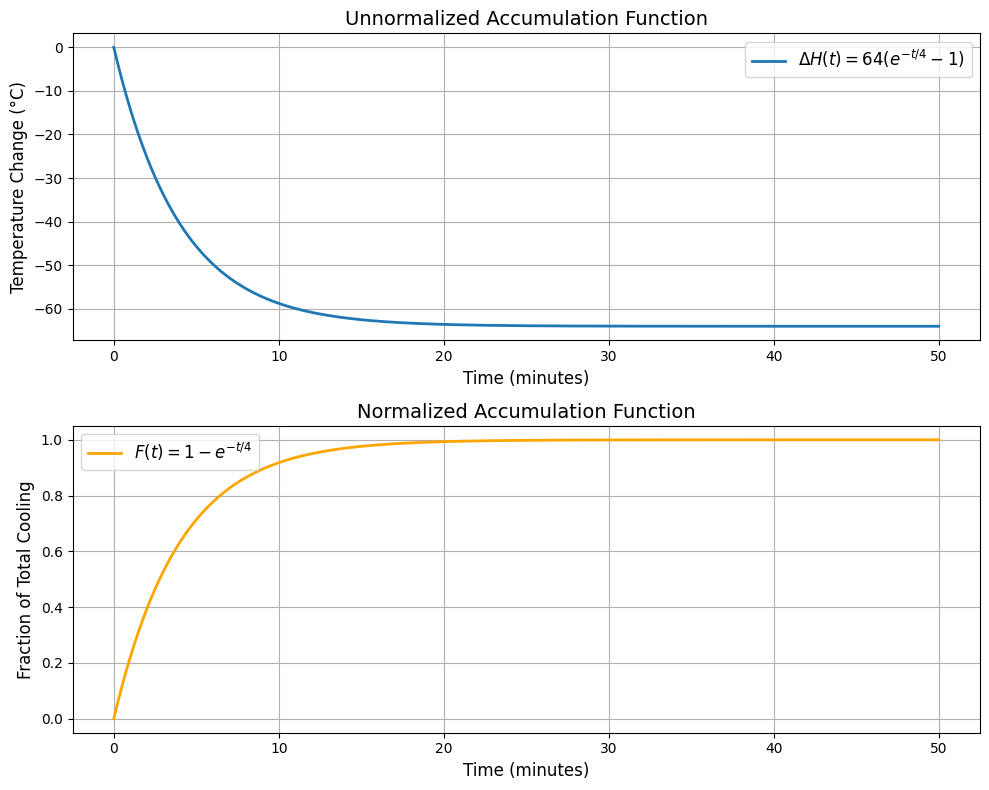

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define a time array (e.g., from 0 to 50 minutes)
t_vals = np.linspace(0, 50, 400)

# Unnormalized accumulation: Delta H(t) = 64*(e^{-t/4} - 1)
Delta_H = 64 * (np.exp(-t_vals / 4) - 1)

# Normalized accumulation: F(t) = 1 - e^{-t/4}
F = 1 - np.exp(-t_vals / 4)

# Create two subplots: one for the unnormalized and one for the normalized accumulation functions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the unnormalized accumulation function
ax1.plot(t_vals, Delta_H, label=r"$\Delta H(t) = 64\left(e^{-t/4} - 1\right)$", linewidth=2)
ax1.set_xlabel("Time (minutes)", fontsize=12)
ax1.set_ylabel("Temperature Change (°C)", fontsize=12)
ax1.set_title("Unnormalized Accumulation Function", fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True)
# Note: Delta_H(t) is negative because the temperature drops relative to 91°C.

# Plot the normalized accumulation function
ax2.plot(t_vals, F, label=r"$F(t) = 1 - e^{-t/4}$", color='orange', linewidth=2)
ax2.set_xlabel("Time (minutes)", fontsize=12)
ax2.set_ylabel("Fraction of Total Cooling", fontsize=12)
ax2.set_title("Normalized Accumulation Function", fontsize=14)
ax2.legend(fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()


<a id="9-a"></a>
### <font color="#b33939" color face="Giorgia">**(9) What is the connection between first derivative and normalized accumulation function?**</font>

They are related concepts but represent different things:

- **First Derivative \(H'(t)\):**  
  This is the instantaneous rate of change of the temperature at time \(t\). In our potato cooling model, we have

  $$
  H'(t)=-16e^{-t/4}.
  $$

  It tells you how fast the temperature is changing at any given moment.

- **Unnormalized Accumulation $\Delta H(t)$:**  
  This represents the net change in temperature over an interval from \(t=0\) to \(t\). It is given by

  $$
  \Delta H(t)=H(t)-H(0)=64\left(e^{-t/4}-1\right).
  $$

  This accumulation is obtained by integrating the first derivative from \(t=0\) up to time \(t\) (or, equivalently, by computing the difference \(H(t)-H(0)\)). It shows how much the temperature has dropped (in °C) after a certain time.

In summary:

- The **first derivative** gives the instantaneous change (i.e. the slope of the curve at each point).  
- The **unnormalized accumulation** gives the total change over time (i.e. the difference between the starting temperature and the temperature at time \(t\)).

They are connected by the Fundamental Theorem of Calculus:

$$
\Delta H(t) = \int_0^t H'(s)\, ds = H(t)-H(0),
$$

but they are not the same quantity.

<a id="10-a"></a>
### <font color="#b33939" color face="Giorgia">**(10) How much time does it take to reduce the temperature from 91 °C to 27.01 °C ?**</font>

We start with the temperature function

$$
H(t) = 27 + 64e^{-t/4}.
$$

We want to find the time $t$ when

$$
H(t) = 27.01.
$$

#### Step 1. Set Up the Equation

Substitute $H(t)=27.01$:

$$
27 + 64e^{-t/4} = 27.01.
$$

#### Step 2. Isolate the Exponential Term

Subtract 27 from both sides:

$$
64e^{-t/4} = 27.01 - 27 = 0.01.
$$

Divide by 64:

$$
e^{-t/4} = \frac{0.01}{64} = \frac{1}{6400}.
$$

#### Step 3. Solve for \(t\)

Take the natural logarithm of both sides:

$$
-\frac{t}{4} = \ln\left(\frac{1}{6400}\right).
$$

Since $ln\left(\frac{1}{6400}\right) = -\ln(6400)$, we have:

$$
-\frac{t}{4} = -\ln(6400).
$$

Multiply both sides by $-4$:

$$
t = 4\ln(6400) \approx 4 \times 8.7638 \approx 35.06 \text{ minutes}.
$$

#### Final Answer

It takes approximately **35.06 minutes** for the temperature to reduce from $91^\circ\text{C}$ to $27.01^\circ\text{C}$.

In [14]:
import sympy as sp

# Define the symbol for time
t = sp.symbols('t', positive=True)

# Define the temperature function H(t)
H_t = 27 + 64 * sp.exp(-t/4)

# Set up the equation H(t) = 27.01
eq = sp.Eq(H_t, 27.01)

# Solve the equation for t
solution = sp.solve(eq, t)
print("Exact solution for t:", solution)

# Convert the solution to a numerical value
t_value = sp.N(solution[0])
print("It takes approximately", t_value, "minutes for the temperature to reduce to 27.01°C.")

Exact solution for t: [35.0562130773910]
It takes approximately 35.0562130773910 minutes for the temperature to reduce to 27.01°C.


We want to compute the time required for the potato to cool to a target temperature $T$ (in °C) using the cooling model

$$
H(t) = 27 + 64e^{-t/4}.
$$

Setting $H(t) = T$, we have

$$
27 + 64e^{-t/4} = T.
$$

#### Derivation of the Formula

1. **Isolate the exponential term:**

   Subtract $27$ from both sides:

   $$
   64e^{-t/4} = T - 27.
   $$

2. **Divide by $64$:**

   $$
   e^{-t/4} = \frac{T - 27}{64}.
   $$

3. **Take the natural logarithm:**

   $$
   -\frac{t}{4} = \ln\left(\frac{T - 27}{64}\right).
   $$

4. **Solve for $t$:**

   $$
   t = -4\ln\left(\frac{T - 27}{64}\right).
   $$

*Note:* This formula is valid for $T$ in the interval $(27, 91]$, because the initial temperature is $91^\circ \mathrm{C}$ and the potato cools toward $27^\circ \mathrm{C}$.

---

#### Python Function

Below is the Python code that defines a function to compute $t$ given $T$ using the formula derived above:


In [15]:
import math

def time_to_temperature(T):
    """
    Returns the time (in minutes) required for the potato to cool 
    to the target temperature T (in °C) using the cooling model:
    
        H(t) = 27 + 64e^{-t/4}.
    
    Parameters:
      T (float): Target temperature in °C (must be in the interval (27, 91]).
    
    Returns:
      float: Time in minutes.
      
    Raises:
      ValueError: If T is not in the valid range.
    """
    if T <= 27 or T > 91:
        raise ValueError("Target temperature T must be in the interval (27, 91].")
    return -4 * math.log((T - 27) / 64)

# Example usage:
T_target = 27.01
t_target = time_to_temperature(T_target)
print(f"It takes approximately {t_target:.4f} minutes for the temperature to reduce to {T_target}°C.")

It takes approximately 35.0562 minutes for the temperature to reduce to 27.01°C.


<a id="11-a"></a>
### <font color="#b33939" color face="Giorgia">**(11) What is the average value of the function $H(t)$ over the closed interval $0 \le x \le 35.06$?**</font>

**Step 1. Write the formula for the average value:**

$$
H_{\mathrm{avg}} = \frac{1}{b-a} \int_a^b H(t)\, dt \quad \text{with } a = 0,\; b = 35.06.
$$

Given

$$
H(t) = 27 + 64e^{-t/4},
$$

we have

$$
H_{\mathrm{avg}} = \frac{1}{35.06} \int_0^{35.06} \left(27 + 64e^{-t/4}\right) dt.
$$

---

**Step 2. Evaluate the integral:**

Break the integral into two parts:

- **Constant term:**

$$
\int_0^{35.06} 27\, dt = 27 \times 35.06 \approx 946.62.
$$

- **Exponential term:**

$$
64\int_0^{35.06} e^{-t/4}\, dt = 64 \left[-4e^{-t/4}\right]_0^{35.06} = -256\left(e^{-35.06/4} - 1\right).
$$

This can be rewritten as:

$$
256\left(1 - e^{-35.06/4}\right).
$$

Given that

$$
H(35.06) = 27.01,
$$

we know:

$$
27 + 64e^{-35.06/4} = 27.01 \quad \Longrightarrow \quad 64e^{-35.06/4} = 0.01,
$$

hence

$$
e^{-35.06/4} = \frac{0.01}{64} = \frac{1}{6400}.
$$

Now, compute the exponential part:

$$
256\left(1 - \frac{1}{6400}\right) \approx 256 \times 0.99984375 \approx 255.96.
$$

- **Total definite integral:**

$$
\int_0^{35.06} \left(27 + 64e^{-t/4}\right)\, dt \approx 946.62 + 255.96 \approx 1202.58.
$$

---

**Step 3. Compute the average value:**

Divide the total integral by the length of the interval:

$$
H_{\mathrm{avg}} = \frac{1202.58}{35.06} \approx 34.3.
$$

---

**Final Answer:**

The average value of the function \(H(t)\) over the interval \([0,35.06]\) is approximately

$$
\boxed{34.3^\circ \text{C}}.
$$

---

In [16]:
import numpy as np

# Define the function H(t)
def H(t):
    return 27 + 64 * np.exp(-t/4)

# Define the integration interval and generate time values
a = 0
b = 35.06
t_vals = np.linspace(a, b, 400)  # 400 points between 0 and 35.06

# Evaluate H(t) over the interval
H_vals = H(t_vals)

# Numerically integrate H(t) using the trapezoidal rule
integral_value = np.trapezoid(H_vals, t_vals)

# Compute the average value: (1/(b-a)) * (definite integral)
H_avg = integral_value / (b - a)

print("Average value of H(t) over [0,35.06]:", H_avg)

Average value of H(t) over [0,35.06]: 34.3009221601352


Average value of H(t) over [0,35.06]: 34.3009221601352


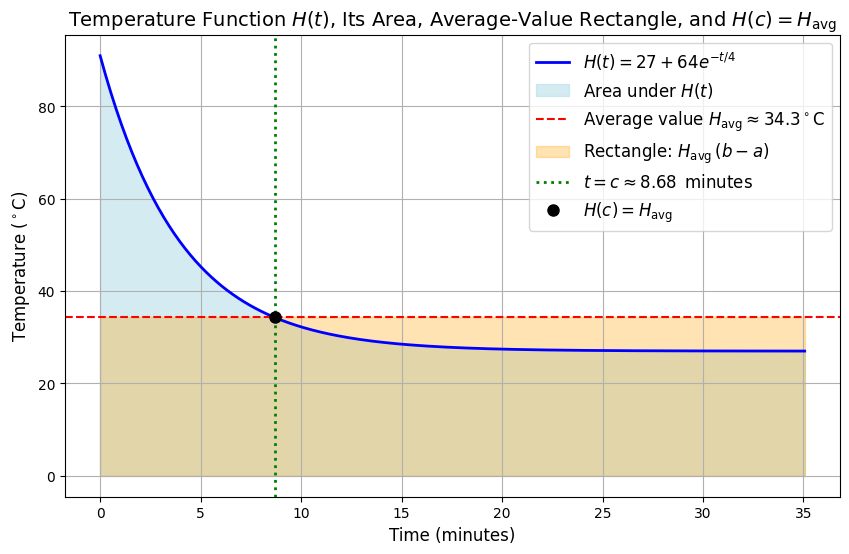

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function H(t)
def H(t):
    return 27 + 64 * np.exp(-t/4)

# Define the integration interval and generate time values
a = 0
b = 35.06
t_vals = np.linspace(a, b, 400)  # 400 points between 0 and 35.06

# Evaluate H(t) over the interval
H_vals = H(t_vals)

# Numerically integrate H(t) using the trapezoidal rule
integral_value = np.trapezoid(H_vals, t_vals)

# Compute the average value: (1/(b-a)) * (definite integral)
H_avg = integral_value / (b - a)

print("Average value of H(t) over [0,35.06]:", H_avg)

# Compute the point c such that H(c) = H_avg.
# H(c) = 27 + 64e^{-c/4} = H_avg  implies  e^{-c/4} = (H_avg - 27) / 64.
# Solving for c:  c = -4 * ln((H_avg - 27)/64).
c = -4 * np.log((H_avg - 27) / 64)

# For the rectangle representing the average value area:
# Its area is H_avg*(b-a), and we plot it as a rectangle from y = 0 to y = H_avg.
rectangle_y = H_avg * np.ones_like(t_vals)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the temperature function H(t)
plt.plot(t_vals, H_vals, label=r"$H(t)=27+64e^{-t/4}$", color='blue', linewidth=2)

# Fill the area under H(t)
plt.fill_between(t_vals, H_vals, color='lightblue', alpha=0.5, label=r"Area under $H(t)$")

# Plot the horizontal line for the average value
plt.axhline(H_avg, color='red', linestyle='--', 
            label=r"Average value $H_{\mathrm{avg}}\approx %.1f^\circ\mathrm{C}$" % H_avg)

# Fill the rectangle area representing $H_{\mathrm{avg}}\,(b-a)$
plt.fill_between(t_vals, 0, rectangle_y, color='orange', alpha=0.3,
                 label=r"Rectangle: $H_{\mathrm{avg}}\,(b-a)$")

# Plot a vertical line at t = c and mark the point (c, H_avg)
plt.axvline(c, color='green', linestyle=':', linewidth=2, label=r"$t=c\approx %.2f\,$ minutes" % c)
plt.plot(c, H_avg, 'ko', markersize=8, label=r"$H(c)=H_{\mathrm{avg}}$")

# Set labels and title
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Temperature ($^\circ$C)", fontsize=12)
plt.title("Temperature Function $H(t)$, Its Area, Average-Value Rectangle, and $H(c)=H_{\mathrm{avg}}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


**Short Explanation:**

- **Blue Curve:**  
  Plots  
  $$H(t)=27+64e^{-t/4},$$  
  the temperature function.

- **Light Blue Area:**  
  Represents the area under \( H(t) \) over \([0,35.06]\).

- **Red Dashed Line:**  
  Shows the average value  
  $$H_{\mathrm{avg}}=\frac{1}{35.06}\int_{0}^{35.06} H(t)\,dt \approx 34.3^\circ \text{C}.$$

- **Orange Rectangle:**  
  Has area  
  $$H_{\mathrm{avg}}\,(b-a),$$  
  which is equal to the area under \( H(t) \).

- **Green Vertical Line and Marker:**  
  Indicates the unique point \( c \) in the interval where  
  $$H(c)=H_{\mathrm{avg}},$$  
  with
  $$c = -4\ln\left(\frac{H_{\mathrm{avg}}-27}{64}\right)$$  
  (approximately 8.68 minutes).

This plot visually demonstrates the average value of \( H(t) \) in two ways: as a horizontal line and as the height of a rectangle whose area equals the area under the curve, and it shows the specific point \( c \) where the function equals its average value.

<a id="12-a"></a>
### <font color="#b33939" color face="Giorgia">**(12) What is the average rate of change (i.e. the slope of the secant line) of the function $H(t)$ over the interval $0 \le x \le 35.06$?**</font>

Below is the updated explanation and Python code with all instances of \(F\) changed to \(H\) and \(F'\) changed to \(H'\), and all mathematical expressions properly enclosed in dollar signs for Markdown.

---

**Step 1. Compute the Average Rate of Change**

We want to find the average rate of change (i.e., the slope of the secant line) of

$$
H(t)=27+64e^{-t/4}
$$

over the interval $[0,35.06]$. The formula we use is

$$
\text{Average Rate} = \frac{H(b)-H(a)}{b-a} \quad \text{with } a=0,\; b=35.06.
$$

Given that

$$
H(0)=27+64=91 \quad \text{and} \quad H(35.06)\approx27.01,
$$

the average rate is

$$
\frac{27.01-91}{35.06-0}\approx \frac{-63.99}{35.06}\approx -1.83^\circ\mathrm{C/min}.
$$

---

**Step 2. Find the Value of $c$ Using the Mean Value Theorem**

The Mean Value Theorem states that there exists a point $c$ in $[0,35.06]$ such that

$$
H'(c)=\text{Average Rate}.
$$

For our function, the derivative is

$$
H'(t)=-16e^{-t/4}.
$$

So we set

$$
-16e^{-c/4}\approx -1.83.
$$

Isolating the exponential, we have

$$
e^{-c/4} \approx \frac{1.83}{16}.
$$

Taking the natural logarithm and solving for $c$, we obtain

$$
-\frac{c}{4} \approx \ln\left(\frac{1.83}{16}\right) \quad \Longrightarrow \quad c\approx -4\ln\left(\frac{1.83}{16}\right).
$$

Numerically, this yields $c\approx 8.68$ minutes.

---

**Step 3. Python Code**

Below is the complete Python code that computes these values, plots the function $H(t)$ along with the secant line connecting the endpoints, and marks the point $c$ where $H'(c)$ equals the average rate.


Average rate of change = -1.8251571438341825
c = 8.68369053080697


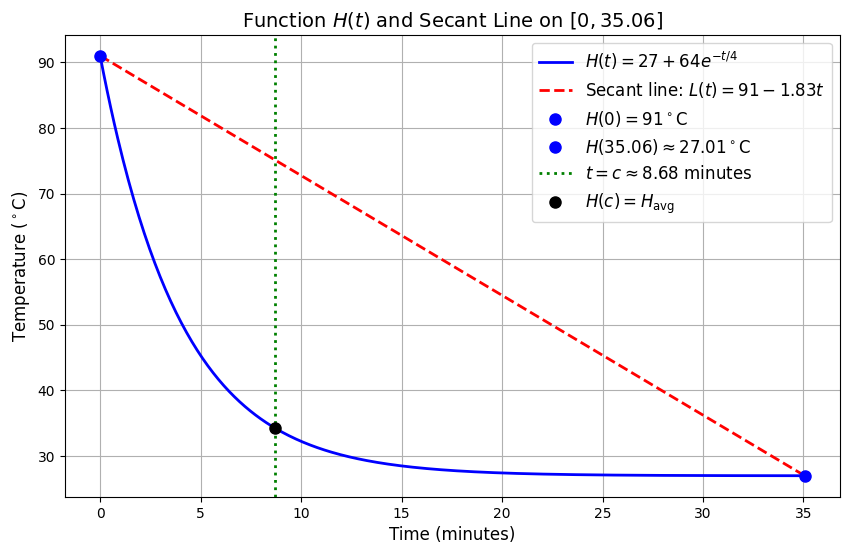

The value of c where H'(c) equals the average rate is approximately: 8.68369053080697 minutes.


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the temperature function H(t)
def H(t):
    return 27 + 64 * np.exp(-t/4)

# Define the derivative H'(t)
def H_prime(t):
    return -16 * np.exp(-t/4)

# Set the interval endpoints
a = 0
b = 35.06

# Evaluate H(t) at the endpoints
H_a = H(a)   # H(0) = 91
H_b = H(b)   # Approximately 27.01

# Compute the average rate of change (secant slope)
average_rate = (H_b - H_a) / (b - a)
print("Average rate of change =", average_rate)  # Should be approx -1.83

# Define the secant line function: L(t) = H(0) + average_rate * t
def L(t):
    return H_a + average_rate * t

# Solve for c such that H'(c) equals the average rate.
# We have H'(c) = -16 * exp(-c/4) = average_rate.
# Rearranging gives: exp(-c/4) = -average_rate / 16.
# Then: c = -4 * ln(-average_rate / 16).
c = -4 * np.log(-average_rate/16)
print("c =", c)  # Should be approx 8.68

# Generate time values for plotting
t_vals = np.linspace(a, b, 400)

# Evaluate H(t) and the secant line for these time values
H_vals = H(t_vals)
L_vals = L(t_vals)

# Plot H(t) and the secant line
plt.figure(figsize=(10, 6))
plt.plot(t_vals, H_vals, label=r"$H(t)=27+64e^{-t/4}$", color='blue', linewidth=2)
plt.plot(t_vals, L_vals, label=r"Secant line: $L(t)=91-1.83t$", linestyle='--', color='red', linewidth=2)

# Mark the endpoints
plt.plot(a, H_a, 'bo', markersize=8, label=r"$H(0)=91^\circ\mathrm{C}$")
plt.plot(b, H_b, 'bo', markersize=8, label=r"$H(35.06)\approx27.01^\circ\mathrm{C}$")

# Mark the point c where H'(c) equals the average rate
plt.axvline(c, color='green', linestyle=':', linewidth=2, label=r"$t=c\approx %.2f$ minutes" % c)
plt.plot(c, H(c), 'ko', markersize=8, label=r"$H(c)=H_{\mathrm{avg}}$")

plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Temperature ($^\circ$C)", fontsize=12)
plt.title("Function $H(t)$ and Secant Line on $[0,35.06]$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

print("The value of c where H'(c) equals the average rate is approximately:", c, "minutes.")

**Short Explanation of the Plot**

- **Blue Curve:**  
  Plots the function

  $$
  H(t)=27+64e^{-t/4},
  $$

  which starts at $H(0)=91^\circ\mathrm{C}$ and decreases toward $27^\circ\mathrm{C}$.

- **Red Dashed Secant Line:**  
  The secant line connects the endpoints $(0, H(0))$ and $(35.06, H(35.06))$, with

  $$
  \text{Average Rate}=\frac{H(35.06)-H(0)}{35.06}\approx -1.83^\circ\mathrm{C/min}.
  $$

  Its equation is

  $$
  L(t)=91-1.83t.
  $$

- **Green Vertical Line and Black Marker:**  
  The green vertical line is drawn at $t=c$ and the black marker shows the point $(c, H(c))$, where $c$ is such that

  $$
  H'(c)=\text{Average Rate}.
  $$

  Here, $c\approx 8.68$ minutes.

This code and explanation demonstrate how to compute the average rate of change, plot the secant line, and find the point $c$ using the Mean Value Theorem in the context of the potato cooling model.

<a id="13-a"></a>
### <font color="#b33939" color face="Giorgia">**(13) Summarize the difference between the average rate of change (i.e. the slope of the secant line)and the average value of the function $H(t)$ over the interval $0 \le x \le 35.06$?**</font>

#### Average Rate of Change

- **Definition:**  
  The average rate of change of a function over an interval $[a,b]$ is the slope of the secant line connecting the endpoints. For our function  
  $$H(t)=27+64e^{-t/4},$$  
  the average rate of change over the interval $[0,35.06]$ is given by:
  $$
  \text{Average Rate} = \frac{H(35.06)-H(0)}{35.06-0}.
  $$

- **Interpretation:**  
  It represents the overall change in the temperature (in $^\circ\mathrm{C}$) per unit time (in minutes) over the entire interval. In our example:
  - We have $H(0)=91^\circ\mathrm{C}$ and $H(35.06)\approx27.01^\circ\mathrm{C}$.  
  - Thus,
    $$
    \frac{27.01-91}{35.06}\approx -1.83^\circ\mathrm{C/min}.
    $$
  This means that, on average, the temperature decreases at a rate of about $-1.83^\circ\mathrm{C}$ per minute between $t=0$ and $t=35.06$.

---

#### Average Value of the Function

- **Definition:**  
  The average value of a function over an interval is the mean (or average) of all the function's values on that interval. It is defined as:
  $$
  H_{\mathrm{avg}} = \frac{1}{b-a}\int_a^b H(t)\,dt.
  $$

- **Interpretation:**  
  For our example, the average value over the interval $[0,35.06]$ is computed by integrating the function $H(t)$ and then dividing by the length of the interval. The result is a value in degrees Celsius that represents the "typical" temperature of the potato over that time period. In our calculation, this average value is approximately:
  $$
  H_{\mathrm{avg}} \approx 34.3^\circ\mathrm{C}.
  $$

---

#### Key Differences

- **What They Measure:**  
  - The **average rate of change** measures the overall slope or the net change per minute. In our case, it tells you how quickly the potato's temperature is dropping between the two endpoints.
  - The **average value** represents the mean temperature of the potato over the entire interval. It takes into account all the temperatures along the time span, not just the endpoints.

- **Units:**  
  - The average rate of change is expressed in units of temperature per unit time (e.g., $^\circ\mathrm{C/min}$).
  - The average value is expressed in units of temperature (e.g., $^\circ\mathrm{C}$).

- **Calculation Method:**  
  - To compute the **average rate of change**, you only need the values at the endpoints.
  - To compute the **average value**, you integrate the function over the interval and then divide by the interval length.

---

#### Summary in Our Example

- **Average Rate of Change:**  
  $$
  \frac{H(35.06)-H(0)}{35.06}\approx \frac{27.01-91}{35.06}\approx -1.83^\circ\mathrm{C/min}.
  $$
  This tells you that the temperature is falling by about $1.83^\circ\mathrm{C}$ per minute on average.

- **Average Value:**  
  $$
  H_{\mathrm{avg}} = \frac{1}{35.06}\int_0^{35.06} H(t)\,dt\approx 34.3^\circ\mathrm{C}.
  $$
  This is the overall "typical" temperature of the potato during the cooling period.

They provide different insights: one tells you the overall speed of cooling (the rate of change), and the other tells you the overall average temperature during the cooling interval.


<a id="14-a"></a>
### <font color="#b33939" color face="Giorgia">**(14) Create the 1st to 5th Order Taylor Polynomials. Calculate the Error of Approximation. Plot All 5 Taylor Approximations and Their Errors.**</font>

Taylor's polynomials are used to approximate a function locally with a simpler polynomial expression. Even though we have the exact formula

$$
H(t)=27+64e^{-t/4},
$$

there are several reasons you might want to use its Taylor polynomial instead of (or in addition to) directly using $H(t)$:

1. **Local Approximation and Simplification:**  
   Taylor's series provides a polynomial approximation that is often easier to evaluate, differentiate, or integrate near the point of expansion (typically $t=0$). For example, the first-order Taylor polynomial

   $$
   T_1(t)=91-16t
   $$

   gives a simple linear approximation of $H(t)$ near $t=0$. This can be useful for quick estimations when $t$ is small.

2. **Insight into the Function's Behavior:**  
   By looking at successive terms in the Taylor expansion, you can gain insight into the function's local behavior. The coefficients (obtained from derivatives at the expansion point) tell you about the rate of change, curvature, and higher-order effects:
   - $H(0) = 91$ is the initial temperature.
   - $H'(0) = -16$ shows how rapidly the temperature is dropping initially.
   - $H''(0)=4$ indicates the curvature (or concavity) of the function.

3. **Error Analysis:**  
   Taylor's theorem comes with a remainder term (often expressed using the Lagrange form), which allows you to estimate the error when using a finite Taylor polynomial to approximate the function. This helps determine how many terms are necessary to achieve a desired accuracy. In our potato cooling example, you can decide whether a 2nd order approximation is sufficient or if higher orders are required to stay within a certain error tolerance.

4. **Applicability to More Complex Scenarios:**  
   In many problems, the exact function may not be available in closed form or might be very complicated. Taylor polynomials then provide an accessible way to work with an approximation that captures the essential behavior of the function. Even though our $H(t)$ is relatively simple, practicing Taylor approximations builds skills that apply to more complex situations.

---

In summary, using Taylor's polynomials allows you to approximate the behavior of $H(t)$ in a controlled manner, analyze the error, and simplify calculations --- especially useful when you need quick estimates or when the full function is too complex to work with directly.

#### (1) Create the 1st to 5th Order Taylor Polynomials

We start with the function

$$
H(t)=27+64e^{-t/4},
$$

which is the temperature (in $^\circ\mathrm{C}$) of a potato over time (in minutes). We expand it in a Taylor series about $t=0$. Recall that the Taylor expansion is

$$
H(t)=H(0)+H'(0)t+\frac{H''(0)}{2!}t^2+\frac{H'''(0)}{3!}t^3+\cdots,
$$

where, for our function, we have:
- $H(0)=91$,
- $H'(0)=-16$,
- $H''(0)=4$ so that $\frac{H''(0)}{2!}=2$,
- $H'''(0)=-\frac{4}{4^2}$ so that $\frac{H'''(0)}{3!}=-\frac{1}{6}$,
- etc.

The Taylor polynomials (of orders 1 to 5) will then be:
- 1st order: $$T_1(t)=91-16t.$$
- 2nd order: $$T_2(t)=91-16t+2t^2.$$
- 3rd order: $$T_3(t)=91-16t+2t^2-\frac{1}{6}t^3.$$
- 4th order: $$T_4(t)=91-16t+2t^2-\frac{1}{6}t^3+\frac{1}{96}t^4.$$
- 5th order: $$T_5(t)=91-16t+2t^2-\frac{1}{6}t^3+\frac{1}{96}t^4-\frac{1}{1920}t^5.$$

We use the following code to generate and display the polynomials:

In [19]:
import sympy as sp

# Initialize pretty printing
sp.init_printing()

# Define the symbol for time and function H(t)
t = sp.symbols('t')
H = sp.Function('H')
H_t = H(t)

# Compute the derivative H'(t)
derivative_H_t = sp.diff(H_t, t)

# Create the differential equation: H'(t) = -1/4*(H(t)-27)
eq_H_prime_H = sp.Eq(derivative_H_t, -sp.Rational(1,4)*(H_t - 27))

# Solve the differential equation with H(0)=91
eq_H_t = sp.dsolve(eq_H_prime_H, H_t, ics={H(0): 91})

# Define a function to compute the Taylor polynomial of a given order
def taylor_poly(expr, var, order):
    # Compute the series up to order+1 and remove the O-notation
    return sp.series(expr, var, 0, order+1).removeO()

# Display Taylor approximations for orders 1, 2, 3, 4, and 5
for order in range(1, 6):
    poly = taylor_poly(eq_H_t.rhs, t, order)
    print(f"{order} Order Taylor Polynomial:")
    sp.pprint(poly)
    print("\n")

1 Order Taylor Polynomial:
91 - 16⋅t


2 Order Taylor Polynomial:
   2            
2⋅t  - 16⋅t + 91


3 Order Taylor Polynomial:
   3                   
  t       2            
- ── + 2⋅t  - 16⋅t + 91
  6                    


4 Order Taylor Polynomial:
 4    3                   
t    t       2            
── - ── + 2⋅t  - 16⋅t + 91
96   6                    


5 Order Taylor Polynomial:
    5     4    3                   
   t     t    t       2            
- ──── + ── - ── + 2⋅t  - 16⋅t + 91
  1920   96   6                    




*Note:* You might see the terms ordered differently (e.g. $2t^2-16t+91$) but they are mathematically equivalent to writing $91-16t+2t^2+\cdots$.

---

#### (2) Calculate the Error of Approximation

The **error of approximation** for an $n$th order Taylor polynomial $T_n(t)$ is defined as

$$
E_n(t)=\left|H(t)-T_n(t)\right|.
$$

This error function tells you how close the Taylor polynomial is to the true function at each value of $t$. In our potato example, you might ask:
- Which order Taylor polynomial gives an error that is acceptable for the time interval of interest?
- For very small values of $t$, even the first or second order might provide an acceptable approximation.
- However, if you need accuracy over a wider range (say, up to 10 or 20 minutes), you might need the third, fourth, or fifth order approximation.

Typically, if the error $E_n(t)$ is within, say, $1^\circ\mathrm{C}$ over the time interval of interest, then you may choose that order. You need to balance accuracy against the complexity of using a higher order. For our potato cooling problem:
- For times very close to $t=0$, a 1st order approximation ($91-16t$) might be acceptable.
- As $t$ increases, the 1st order error quickly becomes large.
- The 2nd order ($91-16t+2t^2$) significantly improves the approximation for moderate values of $t$.
- If even more accuracy is required for larger $t$, then 3rd, 4th, or 5th order approximations might be needed.

---

#### (3) Plot All 5 Taylor Approximations and Their Errors

Below is the complete Python code using both Sympy and Matplotlib to:
- Compute the 1st-5th order Taylor polynomials.
- Convert them to numerical functions.
- Plot the original function $H(t)$ along with all Taylor approximations (first chart).
- Compute and plot the error functions $E_n(t)=|H(t)-T_n(t)|$ for each order (second chart).


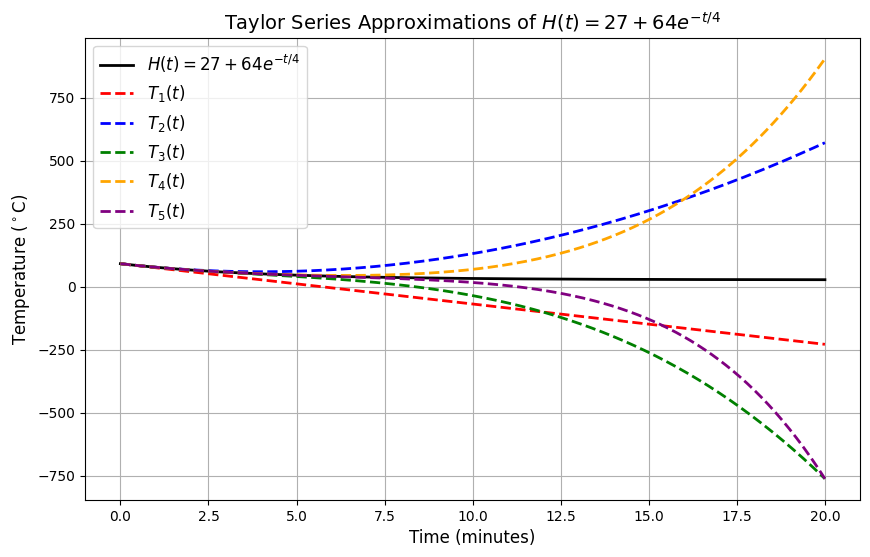

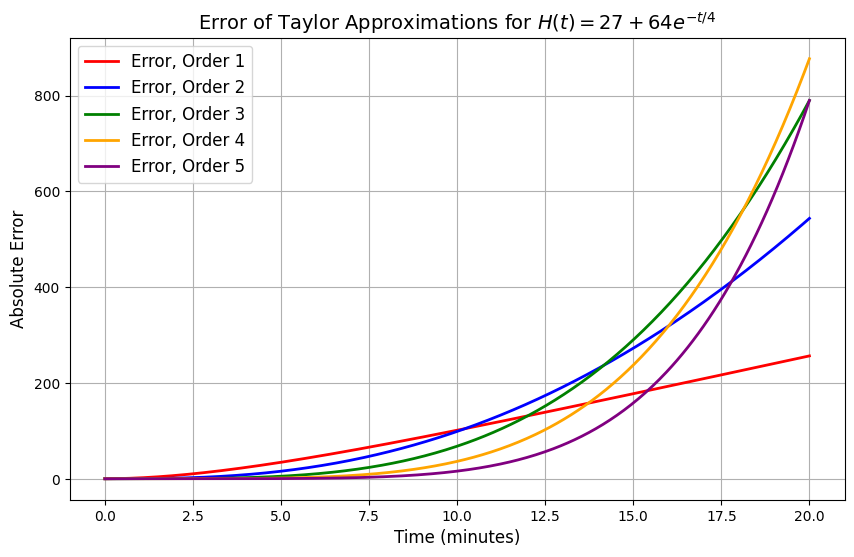

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Initialize pretty printing
sp.init_printing()

# Define the symbol for time and function H(t)
t = sp.symbols('t')
H = sp.Function('H')
H_t = H(t)

# Compute the derivative H'(t)
derivative_H_t = sp.diff(H_t, t)

# Create the differential equation: H'(t) = -1/4*(H(t)-27)
eq_H_prime_H = sp.Eq(derivative_H_t, -sp.Rational(1,4) * (H_t - 27))

# Solve the differential equation with H(0)=91
eq_H_t = sp.dsolve(eq_H_prime_H, H_t, ics={H(0): 91})

# Define a function to compute the Taylor polynomial of a given order
def taylor_poly(expr, var, order):
    return sp.series(expr, var, 0, order + 1).removeO()

# Compute Taylor polynomials for orders 1 to 5 and store them in a dictionary.
orders = [1, 2, 3, 4, 5]
taylor_polys = {}
for order in orders:
    taylor_polys[order] = taylor_poly(eq_H_t.rhs, t, order)

# Convert the original function H(t) to a numerical function.
H_func = sp.lambdify(t, eq_H_t.rhs, 'numpy')

# Convert each Taylor polynomial to a numerical function.
taylor_funcs = {}
for order in orders:
    taylor_funcs[order] = sp.lambdify(t, taylor_polys[order], 'numpy')

# Generate time values (choose an interval where the approximations are used, e.g., 0 to 20 minutes)
t_vals = np.linspace(0, 20, 400)

# Evaluate the original function H(t)
H_vals = H_func(t_vals)

# Evaluate the Taylor approximations and errors.
errors = {}
taylor_vals = {}
for order in orders:
    taylor_vals[order] = taylor_funcs[order](t_vals)
    errors[order] = np.abs(H_vals - taylor_vals[order])

# Plot the original function and all Taylor approximations.
plt.figure(figsize=(10, 6))
plt.plot(t_vals, H_vals, label=r"$H(t)=27+64e^{-t/4}$", color='black', linewidth=2)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, order in enumerate(orders):
    plt.plot(t_vals, taylor_vals[order], label=r"$T_{%d}(t)$" % order, linestyle='--', color=colors[i], linewidth=2)
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Temperature ($^\circ$C)", fontsize=12)
plt.title("Taylor Series Approximations of $H(t)=27+64e^{-t/4}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot the error functions for each Taylor approximation.
plt.figure(figsize=(10, 6))
for i, order in enumerate(orders):
    plt.plot(t_vals, errors[order], label=r"Error, Order %d" % order, color=colors[i], linewidth=2)
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Absolute Error", fontsize=12)
plt.title("Error of Taylor Approximations for $H(t)=27+64e^{-t/4}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


#### Explanation of the Code and Results

1. **Taylor Polynomials:**
   - The code computes the 1st to 5th order Taylor polynomials for  
     $$H(t)=27+64e^{-t/4}$$  
     using the function `taylor_poly()`.
   - For example:
     - The 1st order is $T_1(t)=91-16t$.
     - The 2nd order is $T_2(t)=91-16t+2t^2$.
     - And so on.

2. **Error Computation:**
   - The error for each order is given by  
     $$E_n(t)=|H(t)-T_n(t)|.$$
   - The code computes and stores these errors and then plots them.

3. **Plotting:**
   - The first plot shows the original function (black curve) and all five Taylor approximations (dashed curves in different colors). This visualizes how the approximations improve as the order increases.
   - The second plot shows the absolute error curves for each order, which helps determine which Taylor approximation provides an acceptable error margin over the interval.  
     
     In our potato cooling example:
     - If you are only interested in very small times near $t=0$, a 1st or 2nd order approximation might be acceptable.
     - For larger intervals (e.g., up to 20 minutes), higher order approximations might be required for a lower error.
     
     Based on the error plots, you can decide if a 2nd order approximation (which is simpler) provides sufficient accuracy or if you need a 3rd, 4th, or 5th order approximation.


<a id="15-a"></a>
### <font color="#b33939" color face="Giorgia">**(15) What is "acceptable Error"?**</font>

What is considered an "acceptable error" when using Taylor’s series to approximate our function and how you can calculate error bounds using the Lagrange remainder. In our example, the function is

$$
H(t) = 27 + 64e^{-t/4},
$$

and its Taylor series expansion about $t = 0$ up to order $n$ is

$$
T_n(t) = H(0) + H'(0)t + \frac{H''(0)}{2!}t^2 + \cdots + \frac{H^{(n)}(0)}{n!}t^n.
$$

The **error of approximation** when using the $n$th order Taylor polynomial is given by the Lagrange remainder:

$$
R_n(t)=H(t)-T_n(t)=\frac{H^{(n+1)}(\xi)}{(n+1)!}t^{n+1},
$$

for some $xi$ between $0$ and $t$. For our function

$$
H(t) = 27 + 64e^{-t/4},
$$

its derivatives for $k\ge1$ have the general form

$$
H^{(k)}(t)=64\left(-\frac{1}{4}\right)^k e^{-t/4}.
$$

In particular, the maximum absolute value of $e^{-t/4}$ for $t\ge 0$ is 1, so we can bound the error by

$$
\left|R_n(t)\right|\le \frac{64}{(n+1)!}\left|\left(-\frac{1}{4}\right)^{n+1}\right| \,|t|^{n+1} = \frac{64}{(n+1)!}\left(\frac{t}{4}\right)^{n+1}.
$$

---

#### What Is an Acceptable Error?

"Acceptable error" is application-dependent. In our potato cooling example, you might decide that an absolute error of less than $1^\circ\mathrm{C}$ is acceptable. To decide which order is sufficient, you compare the error bound

$$
E_n(t) = \frac{64}{(n+1)!}\left(\frac{t}{4}\right)^{n+1}
$$

to your tolerance (e.g., $1^\circ\mathrm{C}$ for the range of $t$ values you care about.

For example, let’s calculate the error bounds at a couple of time values using our error formula:

##### For \( t = 2 \) minutes:

1. **1st Order (n=1):**

   $$
   E_1(2) \le \frac{64}{2!}\left(\frac{2}{4}\right)^2 = \frac{64}{2}\left(\frac{1}{2}\right)^2 = 32 \times \frac{1}{4} = 8^\circ\mathrm{C}.
   $$

2. **2nd Order (n=2):**

   $$
   E_2(2) \le \frac{64}{3!}\left(\frac{2}{4}\right)^3 = \frac{64}{6}\left(\frac{1}{2}\right)^3 = \frac{64}{6}\times \frac{1}{8} \approx 1.33^\circ\mathrm{C}.
   $$

3. **3rd Order (n=3):**

   $$
   E_3(2) \le \frac{64}{4!}\left(\frac{2}{4}\right)^4 = \frac{64}{24}\left(\frac{1}{2}\right)^4 = \frac{64}{24}\times \frac{1}{16}\approx 0.167^\circ\mathrm{C}.
   $$

Thus, at $t = 2$ minutes, the 3rd order approximation has an error bound of about $(0.17^\circ\mathrm{C}$, which is well below a $1^\circ\mathrm{C}$ tolerance, while the 1st order error bound (8°C) and even the 2nd order error (1.33°C) are too large.

##### For \( t = 4 \) minutes:

1. **1st Order (n=1):**

   $$
   E_1(4) \le \frac{64}{2!}\left(\frac{4}{4}\right)^2 = 32\times 1^2 = 32^\circ\mathrm{C}.
   $$

2. **2nd Order (n=2):**

   $$
   E_2(4) \le \frac{64}{3!}\left(\frac{4}{4}\right)^3 = \frac{64}{6} \approx 10.67^\circ\mathrm{C}.
   $$

3. **3rd Order (n=3):**

   $$
   E_3(4) \le \frac{64}{4!}\left(\frac{4}{4}\right)^4 = \frac{64}{24} \approx 2.67^\circ\mathrm{C}.
   $$

4. **4th Order (n=4):**

   $$
   E_4(4) \le \frac{64}{5!}\left(\frac{4}{4}\right)^5 = \frac{64}{120} \approx 0.533^\circ\mathrm{C}.
   $$

So for $t = 4$ minutes, if our acceptable error is $1^\circ\mathrm{C}$, the 4th order approximation (with an error bound of about 0.53°C) is acceptable, while lower-order approximations yield larger errors.

---

#### Conclusion Based on the Error Analysis

- For **small times** (e.g., $t \leq 2$ minutes), a **3rd order** Taylor polynomial might be sufficient since its error is below $1^\circ\mathrm{C}$.
- For **larger times** (e.g., $t = 4$ minutes), you might need a **4th order** (or higher) Taylor polynomial to achieve an error of less than $1^\circ\mathrm{C}$.
- For **even larger times**, if the approximation must be valid over an extended interval, you might have to use the **5th order** or even higher order to achieve the desired accuracy.

Thus, whether a 2nd order approximation is enough depends on the interval in which you want your approximation to be accurate. In our potato cooling example, if you require precise values beyond very small times, using the 3rd order or higher is advisable.

---

#### (3) Plot All 5 Orders and Their Errors

Below is the complete Python code that computes the 1st through 5th order Taylor polynomials, plots them alongside the original function $H(t)$, and then plots the absolute error functions $E_n(t)=|H(t)-T_n(t)|$

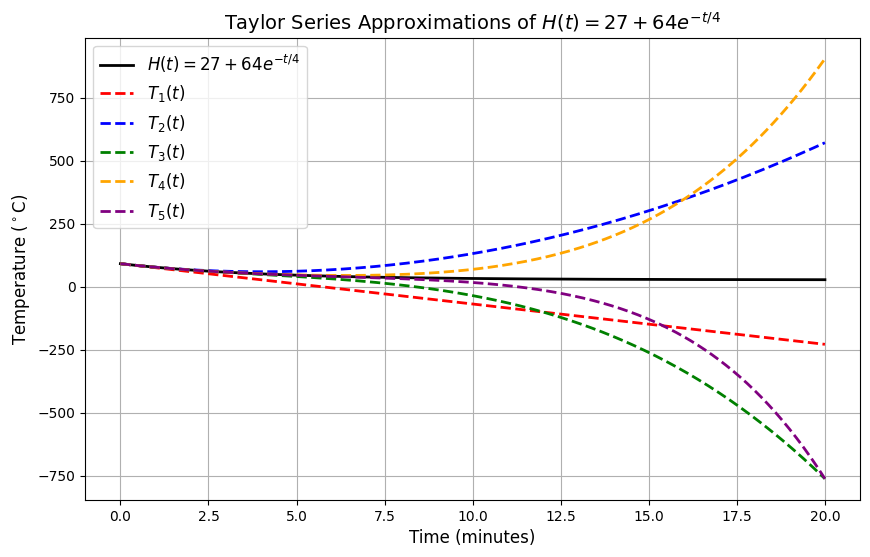

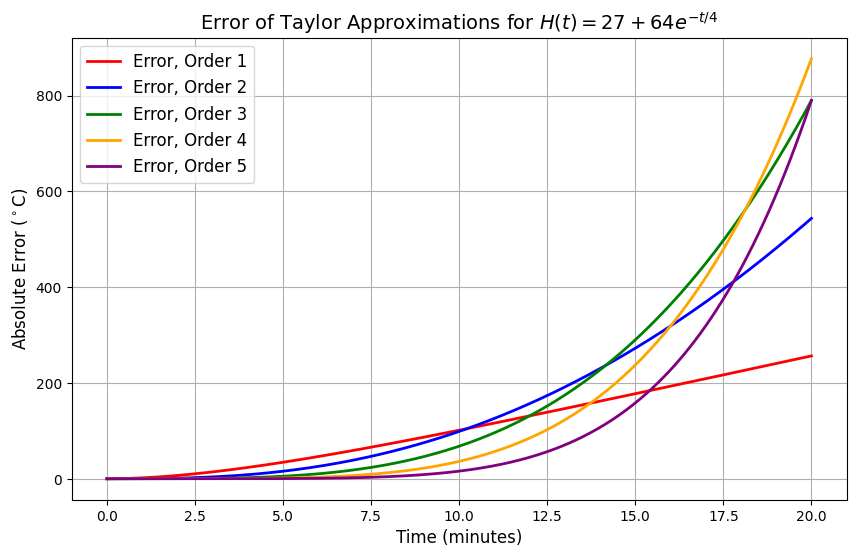

Error bound for order 1 at t = 2 minutes: 8.00 °C
Error bound for order 1 at t = 4 minutes: 32.00 °C
Error bound for order 2 at t = 2 minutes: 1.33 °C
Error bound for order 2 at t = 4 minutes: 10.67 °C
Error bound for order 3 at t = 2 minutes: 0.17 °C
Error bound for order 3 at t = 4 minutes: 2.67 °C
Error bound for order 4 at t = 2 minutes: 0.02 °C
Error bound for order 4 at t = 4 minutes: 0.53 °C
Error bound for order 5 at t = 2 minutes: 0.00 °C
Error bound for order 5 at t = 4 minutes: 0.09 °C


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math  # Import the math module for factorial

# Initialize pretty printing
sp.init_printing()

# Define the symbol and function H(t)
t = sp.symbols('t')
H = sp.Function('H')
H_expr = 27 + 64 * sp.exp(-t/4)

# Solve the differential equation is not necessary here as we already have H_expr.

# Function to compute the Taylor polynomial up to given order
def taylor_poly(expr, var, order):
    return sp.series(expr, var, 0, order+1).removeO()

# Compute Taylor polynomials for orders 1 to 5
orders = [1, 2, 3, 4, 5]
taylor_polys = {}
for order in orders:
    taylor_polys[order] = taylor_poly(H_expr, t, order)

# Convert the original function and Taylor polynomials to numerical functions
H_func = sp.lambdify(t, H_expr, 'numpy')
taylor_funcs = {}
for order in orders:
    taylor_funcs[order] = sp.lambdify(t, taylor_polys[order], 'numpy')

# Define error function using the Lagrange error bound:
# |R_n(t)| <= 64/(n+1)! * (t/4)^(n+1)
def error_bound(n, t_val):
    return 64 / math.factorial(n+1) * (t_val/4)**(n+1)

# Choose a range of t values for plotting (e.g., 0 to 20 minutes)
t_vals = np.linspace(0, 20, 400)

# Evaluate the original function H(t)
H_vals = H_func(t_vals)

# Calculate Taylor approximations and errors for each order
errors = {}
taylor_vals = {}
for order in orders:
    taylor_vals[order] = taylor_funcs[order](t_vals)
    errors[order] = np.abs(H_vals - taylor_vals[order])

# Plot the original function and all Taylor approximations
plt.figure(figsize=(10, 6))
plt.plot(t_vals, H_vals, label=r"$H(t)=27+64e^{-t/4}$", color='black', linewidth=2)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, order in enumerate(orders):
    plt.plot(t_vals, taylor_vals[order], label=r"$T_{%d}(t)$" % order, linestyle='--', color=colors[i], linewidth=2)
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Temperature ($^\circ$C)", fontsize=12)
plt.title("Taylor Series Approximations of $H(t)=27+64e^{-t/4}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot the error functions for each Taylor approximation
plt.figure(figsize=(10, 6))
for i, order in enumerate(orders):
    plt.plot(t_vals, errors[order], label=r"Error, Order %d" % order, color=colors[i], linewidth=2)
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Absolute Error ($^\circ$C)", fontsize=12)
plt.title("Error of Taylor Approximations for $H(t)=27+64e^{-t/4}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Additionally, we can print error bounds for selected t values (e.g., t=2 and t=4)
for order in orders:
    for t_val in [2, 4]:
        eb = error_bound(order, t_val)
        print(f"Error bound for order {order} at t = {t_val} minutes: {eb:.2f} °C")


#### Explanation of the Results

- **Taylor Polynomial Approximations:**  
  The code computes and plots the 1st to 5th order Taylor polynomials of $H(t)=27+64e^{-t/4}$ around $t=0$. They are:
  - $T_1(t)=91-16t$,
  - $T_2(t)=91-16t+2t^2$,
  - $T_3(t)=91-16t+2t^2-\frac{t^3}{6}$,
  - $T_4(t)=91-16t+2t^2-\frac{t^3}{6}+\frac{t^4}{96}$,
  - $T_5(t)=91-16t+2t^2-\frac{t^3}{6}+\frac{t^4}{96}-\frac{t^5}{1920}$.

- **Error Functions:**  
  For each order \(n\), the absolute error is 
  $$
  E_n(t)=|H(t)-T_n(t)|.
  $$
  The second plot shows these error curves, which generally decrease as the order increases. We also compute the Lagrange error bound using
  $$
  |R_n(t)|\le \frac{64}{(n+1)!}\left(\frac{t}{4}\right)^{n+1}.
  $$
  The printed outputs give an indication of the error bounds at \(t=2\) and \(t=4\) minutes.

- **Acceptable Error:**  
  Depending on your criteria for "acceptable error" (e.g., an absolute error less than $1^\circ$C), you can determine which order is sufficient over your time interval. For example, for \(t=2\) minutes, the 3rd order approximation has an error bound of approximately $0.17^\circ$C (which is acceptable), whereas for \(t=4\) minutes, you might need at least a 4th order approximation (with an error of about $0.53^\circ$C) to achieve the same level of accuracy.

This complete code and explanation demonstrate how to calculate and visualize the Taylor series approximations and their errors for the potato cooling function. You can adjust the time interval or error threshold based on your application's needs.

<a id="16-a"></a>
### <font color="#b33939" color face="Giorgia">**(16) What is considered to be acceptable error when using each order to approximate the function? and at which time does the error exceed the tolerance?**</font>

#### Taylor Series Approximations and Error Bound for $H(t)$

We consider the function

$$
H(t)=27+64e^{-t/4},
$$

which models the temperature (in $^\circ\mathrm{C}$) of a potato over time (in minutes). Taylor's Theorem tells us that if a function is sufficiently differentiable at a point (here, $t=0$), then it can be expressed as an infinite series about that point:

$$
H(t)=H(0)+H'(0)t+\frac{H''(0)}{2!}t^2+\frac{H'''(0)}{3!}t^3+\cdots,
$$

and the $n$th order Taylor polynomial is

$$
T_n(t)=\sum_{k=0}^n\frac{H^{(k)}(0)}{k!}t^k.
$$

The error of approximation is given by the Lagrange remainder:

$$
R_n(t)=H(t)-T_n(t)=\frac{H^{(n+1)}(\xi)}{(n+1)!}t^{n+1},
$$

for some $\xi$ between $0$ and $t$. In our case, the derivatives of

$$
H(t)=27+64e^{-t/4}
$$

are given by

$$
H^{(k)}(t)=64\left(-\frac{1}{4}\right)^k e^{-t/4}.
$$

Because $e^{-t/4}\le 1$ for $t\ge 0$, we can bound the error by

$$
\left|R_n(t)\right|\le \frac{64}{(n+1)!}\left(\frac{t}{4}\right)^{n+1}.
$$

---

#### Determining an Acceptable Error

Suppose we require the error to be less than $1^\circ\mathrm{C}$. That is, we set a tolerance of $\varepsilon = 1^\circ\mathrm{C}$ and we want

$$
\frac{64}{(n+1)!}\left(\frac{t}{4}\right)^{n+1} \le 1.
$$

Solving for $t$, we get

$$
\left(\frac{t}{4}\right)^{n+1} \le \frac{(n+1)!}{64} \quad \Longrightarrow \quad t \le 4\left(\frac{(n+1)!}{64}\right)^{\frac{1}{n+1}}.
$$

For each order, we compute the acceptable time boundary:

- **For $n=1$ (1st order):**

  $$
  t \le 4\left(\frac{2!}{64}\right)^{\frac{1}{2}} = 4\left(\frac{2}{64}\right)^{\frac{1}{2}} = 4\left(\frac{1}{32}\right)^{\frac{1}{2}} = \frac{4}{\sqrt{32}} \approx \frac{4}{5.657} \approx 0.71 \text{ minutes}.
  $$

- **For $n=2$ (2nd order):**

  $$
  t \le 4\left(\frac{3!}{64}\right)^{\frac{1}{3}} = 4\left(\frac{6}{64}\right)^{\frac{1}{3}} \approx 4(0.455) \approx 1.82 \text{ minutes}.
  $$

- **For $n=3$ (3rd order):**

  $$
  t \le 4\left(\frac{4!}{64}\right)^{\frac{1}{4}} = 4\left(\frac{24}{64}\right)^{\frac{1}{4}} \approx 4(0.782) \approx 3.13 \text{ minutes}.
  $$

- **For $n=4$ (4th order):**

  $$
  t \le 4\left(\frac{5!}{64}\right)^{\frac{1}{5}} = 4\left(\frac{120}{64}\right)^{\frac{1}{5}} \approx 4(1.134) \approx 4.54 \text{ minutes}.
  $$

- **For $n=5$ (5th order):**

  $$
  t \le 4\left(\frac{6!}{64}\right)^{\frac{1}{6}} = 4\left(\frac{720}{64}\right)^{\frac{1}{6}} \approx 4(1.497) \approx 6.0 \text{ minutes}.
  $$

**Interpretation:**

- With a tolerance of $1^\circ\mathrm{C}$:
  - The **1st order Taylor approximation** is acceptable only up to about $0.71$ minutes.
  - The **2nd order approximation** is acceptable up to about $1.82$ minutes.
  - The **3rd order approximation** is acceptable up to about $3.13$ minutes.
  - The **4th order approximation** is acceptable up to about $4.54$ minutes.
  - The **5th order approximation** is acceptable up to about $6.0$ minutes.

Thus, if you only need an approximation accurate within $1^\circ\mathrm{C}$ for very small times near $t=0$, a 1st or 2nd order Taylor polynomial might be sufficient. However, for a wider time interval (e.g., up to 5 or 6 minutes), you would need a higher order approximation.

---

#### Python Code: Plotting the Taylor Approximations and Their Error Functions

The following Python code computes the Taylor polynomials for orders 1 through 5, plots them along with the original function $H(t)$, and then plots the absolute error functions $E_n(t)=|H(t)-T_n(t)|$. It also prints the acceptable time boundaries based on a $1^\circ\mathrm{C}$ error tolerance.



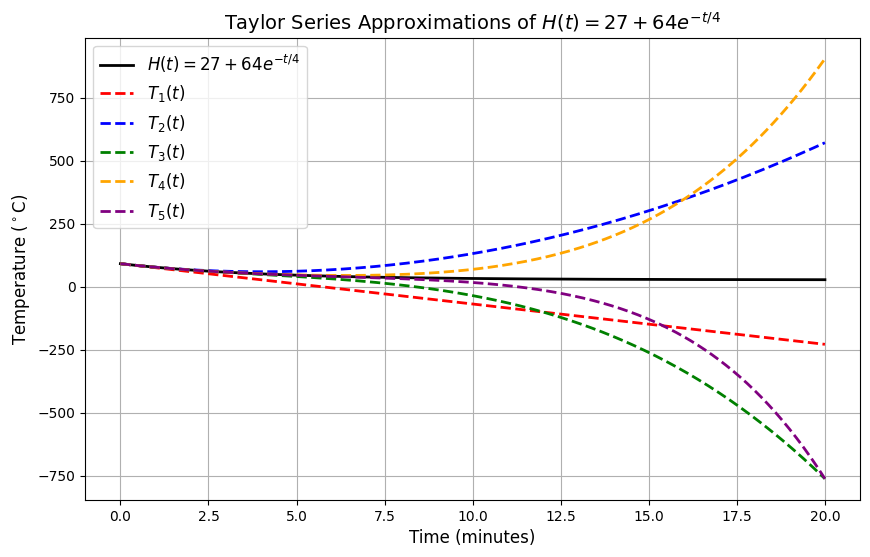

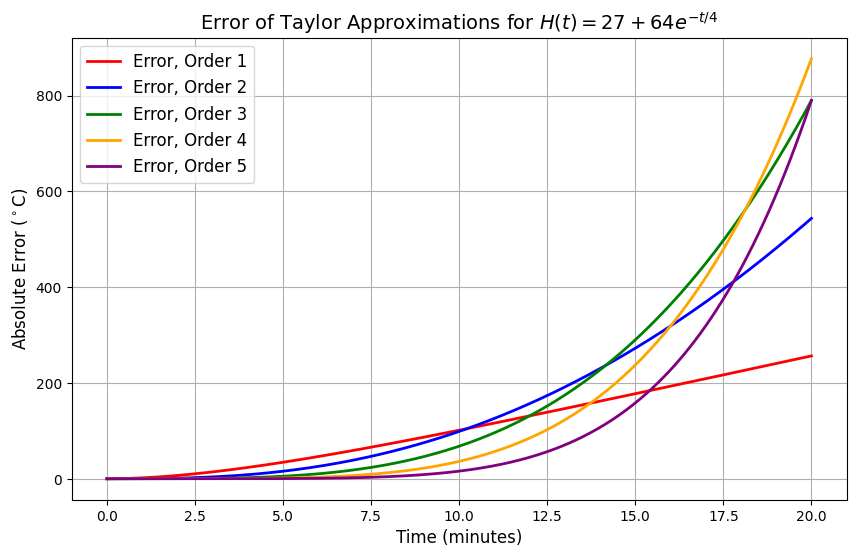

Acceptable time boundary for order 1 approximation (error <= 1°C): 0.71 minutes
Acceptable time boundary for order 2 approximation (error <= 1°C): 1.82 minutes
Acceptable time boundary for order 3 approximation (error <= 1°C): 3.13 minutes
Acceptable time boundary for order 4 approximation (error <= 1°C): 4.54 minutes
Acceptable time boundary for order 5 approximation (error <= 1°C): 5.99 minutes


In [22]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math  # Import the math module for factorial

# Initialize pretty printing
sp.init_printing()

# Define the symbol for time and the function H(t)
t = sp.symbols('t')
H_expr = 27 + 64 * sp.exp(-t/4)

# Define a function to compute the Taylor polynomial of a given order
def taylor_poly(expr, var, order):
    return sp.series(expr, var, 0, order + 1).removeO()

# Compute Taylor polynomials for orders 1 to 5
orders = [1, 2, 3, 4, 5]
taylor_polys = {}
for order in orders:
    taylor_polys[order] = taylor_poly(H_expr, t, order)

# Convert the original function and Taylor polynomials to numerical functions
H_func = sp.lambdify(t, H_expr, 'numpy')
taylor_funcs = {}
for order in orders:
    taylor_funcs[order] = sp.lambdify(t, taylor_polys[order], 'numpy')

# Define the error bound function using the Lagrange remainder:
# |R_n(t)| <= 64/((n+1)!)*(t/4)^(n+1)
def error_bound(n, t_val):
    return 64/np.math.factorial(n+1) * (t_val/4)**(n+1)

# Choose a range of t values for plotting (e.g., 0 to 20 minutes)
t_vals = np.linspace(0, 20, 400)

# Evaluate the original function H(t)
H_vals = H_func(t_vals)

# Evaluate the Taylor approximations and their absolute errors for each order
errors = {}
taylor_vals = {}
for order in orders:
    taylor_vals[order] = taylor_funcs[order](t_vals)
    errors[order] = np.abs(H_vals - taylor_vals[order])

# Plot the original function and all Taylor approximations
plt.figure(figsize=(10, 6))
plt.plot(t_vals, H_vals, label=r"$H(t)=27+64e^{-t/4}$", color='black', linewidth=2)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, order in enumerate(orders):
    plt.plot(t_vals, taylor_vals[order], label=r"$T_{%d}(t)$" % order, linestyle='--', color=colors[i], linewidth=2)
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Temperature ($^\circ$C)", fontsize=12)
plt.title("Taylor Series Approximations of $H(t)=27+64e^{-t/4}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot the absolute error functions for each Taylor approximation
plt.figure(figsize=(10, 6))
for i, order in enumerate(orders):
    plt.plot(t_vals, errors[order], label=r"Error, Order %d" % order, color=colors[i], linewidth=2)
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Absolute Error ($^\circ$C)", fontsize=12)
plt.title("Error of Taylor Approximations for $H(t)=27+64e^{-t/4}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Calculate and print the maximum acceptable time boundaries for each order assuming an error tolerance of 1°C.
tolerance = 1  # 1°C error tolerance
for order in orders:
    # Maximum t such that error_bound(n, t) <= tolerance.
    t_max = 4 * (math.factorial(order+1)/64)**(1/(order+1))
    print(f"Acceptable time boundary for order {order} approximation (error <= {tolerance}°C): {t_max:.2f} minutes")


#### Explanation of the Results

- **Taylor Polynomial Approximations:**  
  The code calculates and plots the 1st through 5th order Taylor polynomials $T_1(t)$ through $T_5(t)$ of 

  $$
  H(t)=27+64e^{-t/4},
  $$

  expanded about $t=0$.

- **Error Functions:**  
  For each order $n$, the absolute error is defined by

  $$
  E_n(t)=|H(t)-T_n(t)|.
  $$

  These errors are plotted to show how the approximation improves as the order increases.

- **Acceptable Error Bound:**  
  By setting a tolerance of $1^\circ\mathrm{C}$, the code computes the maximum value of $t$ for which the error bound

  $$
  E_n(t) \le \frac{64}{(n+1)!}\left(\frac{t}{4}\right)^{n+1}
  $$

  is less than or equal to $1^\circ\mathrm{C}$. The acceptable time boundary increases with the order of the Taylor polynomial.

- **Interpretation for Our Potato Example:**  
  - For very small times (e.g., below 0.71 minutes), even the 1st order approximation is acceptable.
  - As time increases, a higher order is needed to maintain an error less than $1^\circ\mathrm{C}$.
  - These calculations help decide which Taylor polynomial order is sufficient for the time range of interest in the potato cooling model.

This code and explanation allow you to see both the approximations and the error bounds, so you can choose the appropriate order for your application.

<a id="17-a"></a>
### <font color="#b33939" color face="Giorgia">**(17) Explanation of the role that curvature plays in the context of Taylor approximations and error estimates.**</font>

#### The Role of Curvature

1. **Curvature and the Second Derivative:**

   The curvature of a function at a point is closely related to its second derivative. In more geometric terms, curvature measures how quickly a function is bending at a point. For a function $( H(t)$, the curvature (in one dimension, or the "concavity" of the graph) is determined by the second derivative $H''(t)$. In our case, we have:

   $$
   H(t) = 27 + 64e^{-t/4},
   $$
   and its second derivative is

   $$
   H''(t)= 4e^{-t/4}.
   $$

   Since $e^{-t/4}$ is always positive for $t\ge 0$, the function is **concave upward** everywhere. This means that, compared to its tangent line (the 1st order Taylor polynomial), the actual function lies above the tangent line for $t>0$. 

2. **Curvature and Error Estimation:**

   In Taylor's Theorem, the error of approximation when using an $n$th order Taylor polynomial $T_n(t) $ is given by the Lagrange remainder:

   $$
   R_n(t)= H(t)-T_n(t) = \frac{H^{(n+1)}(\xi)}{(n+1)!}t^{n+1},
   $$
   
   for some $xi$ between $0$ and $t$. Notice that the error bound for the **linear approximation** $n=1$ is

   $$
   |R_1(t)| \le \frac{|H''(\xi)|}{2}t^2.
   $$

   Since $H''(\xi)$ measures the curvature, if the curvature is large (i.e., $|H''(\xi)|$ is high), then even for small $t$, the error in the linear approximation will be larger. Thus, curvature directly affects the error of the approximation.

3. **Choosing the Taylor Order Based on Curvature:**

   - **Low Curvature:** If $ H''(t)$ (and higher derivatives) are small over the interval of interest, the function is nearly linear, and even a low-order Taylor polynomial (like the 1st or 2nd order) can provide a good approximation.
   - **High Curvature:** When $H''(t)$ is large, the function bends significantly, and higher-order terms (3rd, 4th, 5th order, etc.) are needed to capture that bending accurately and achieve a small error.

In our potato cooling example:
- The function $H(t)=27+64e^{-t/4}$ is concave upward since $H''(t)=4e^{-t/4} > 0$ for all $t \ge 0$.
- This concavity tells us that the tangent line at $t=0$ (the 1st order approximation, $T_1(t)=91-16t $ lies below the actual curve for $t>0$, leading to an underestimation.
- The error in the linear approximation is influenced by $H''(t)$, and our Lagrange error bound reflects this.
- As we include higher order terms, these terms account for the curvature and correct the error, providing a better approximation over a larger interval.

---

#### Python Code Example

Below is a Python code example that not only computes and plots the Taylor approximations (orders 1 through 5) and their errors but also highlights how the error (which depends on the curvature) decreases as we include higher order terms:



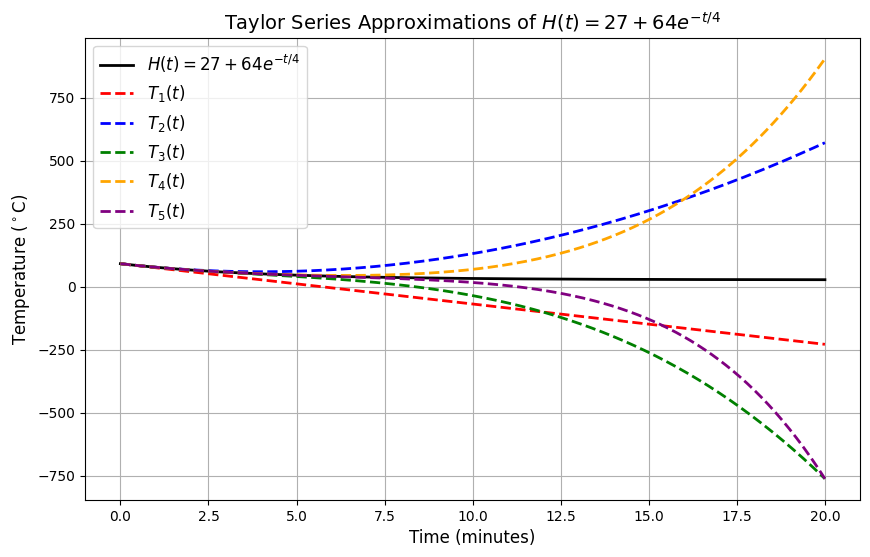

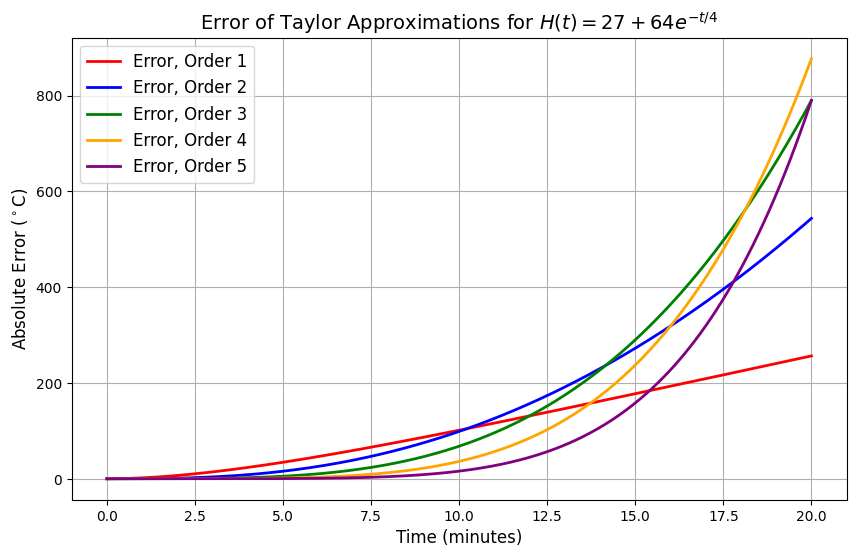

Acceptable time boundary for order 1 approximation (error <= 1°C): 0.71 minutes
Acceptable time boundary for order 2 approximation (error <= 1°C): 1.82 minutes
Acceptable time boundary for order 3 approximation (error <= 1°C): 3.13 minutes
Acceptable time boundary for order 4 approximation (error <= 1°C): 4.54 minutes
Acceptable time boundary for order 5 approximation (error <= 1°C): 5.99 minutes


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Initialize pretty printing
sp.init_printing()

# Define the symbol for time and the function H(t)
t = sp.symbols('t')
H_expr = 27 + 64 * sp.exp(-t/4)

# Define a function to compute the Taylor polynomial of a given order
def taylor_poly(expr, var, order):
    return sp.series(expr, var, 0, order + 1).removeO()

# Compute Taylor polynomials for orders 1 to 5 and store them in a dictionary.
orders = [1, 2, 3, 4, 5]
taylor_polys = {}
for order in orders:
    taylor_polys[order] = taylor_poly(H_expr, t, order)

# Convert the original function and Taylor polynomials to numerical functions.
H_func = sp.lambdify(t, H_expr, 'numpy')
taylor_funcs = {}
for order in orders:
    taylor_funcs[order] = sp.lambdify(t, taylor_polys[order], 'numpy')

# Define the error bound function using the Lagrange error bound:
# |R_n(t)| <= 64/((n+1)!)*(t/4)^(n+1)
def error_bound(n, t_val):
    return 64/np.math.factorial(n+1) * (t_val/4)**(n+1)

# Choose a range of t values for plotting (e.g., 0 to 20 minutes)
t_vals = np.linspace(0, 20, 400)

# Evaluate the original function H(t)
H_vals = H_func(t_vals)

# Evaluate the Taylor approximations and compute the absolute error functions for each order.
errors = {}
taylor_vals = {}
for order in orders:
    taylor_vals[order] = taylor_funcs[order](t_vals)
    errors[order] = np.abs(H_vals - taylor_vals[order])

# Plot the original function and all Taylor approximations.
plt.figure(figsize=(10, 6))
plt.plot(t_vals, H_vals, label=r"$H(t)=27+64e^{-t/4}$", color='black', linewidth=2)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, order in enumerate(orders):
    plt.plot(t_vals, taylor_vals[order], label=r"$T_{%d}(t)$" % order, linestyle='--', color=colors[i], linewidth=2)
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Temperature ($^\circ$C)", fontsize=12)
plt.title("Taylor Series Approximations of $H(t)=27+64e^{-t/4}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot the absolute error functions for each Taylor approximation.
plt.figure(figsize=(10, 6))
for i, order in enumerate(orders):
    plt.plot(t_vals, errors[order], label=r"Error, Order %d" % order, color=colors[i], linewidth=2)
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Absolute Error ($^\circ$C)", fontsize=12)
plt.title("Error of Taylor Approximations for $H(t)=27+64e^{-t/4}$", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Calculate and print the maximum acceptable time boundaries for each order assuming an error tolerance of 1°C.
tolerance = 1  # 1°C error tolerance
for order in orders:
    # Maximum t such that error_bound(n, t) <= tolerance:
    t_max = 4 * (math.factorial(order+1)/64)**(1/(order+1))
    print(f"Acceptable time boundary for order {order} approximation (error <= {tolerance}°C): {t_max:.2f} minutes")


#### In Summary

- **Curvature and Error:**  
  The curvature of $H(t)$ is linked to its second derivative $H''(t)$. A high curvature (large $|H''(t)|$) means the function is bending significantly, which can lead to a larger error in a lower-order Taylor approximation. This error is captured in the Lagrange remainder term.

- **Acceptable Error:**  
  By setting an error tolerance (e.g., $1^\circ$C), we can compute the maximum time $t$ for which a given Taylor polynomial order approximates $H(t)$ accurately. The code calculates these boundaries for each order.

- **Practical Implications:**  
  Depending on how long you want your approximation to remain within the error tolerance, you choose the corresponding Taylor order. In our potato cooling example:
  - A 1st order approximation might be acceptable only for very short times (up to about $0.71$ minutes).
  - Higher order approximations extend the interval over which the approximation is accurate.

This approach helps you decide which Taylor polynomial order is appropriate for your application.

You can include this explanation and the Python code directly in your Jupyter Notebook to study the error of approximation and the role that curvature plays in determining the accuracy of Taylor series approximations.

<a id="18-project"></a>
### <font color="#b33939" color face="Giorgia">**(18) If you can control the cooling rate (for example, by adjusting a thermostat), what is the optimal cooling strategy to reach a desired temperature in the shortest time? Determine the minimal time to reach a given target temperature and compare it with the original cooling strategy.**</font>

**Question:**  
*If you can control the cooling rate (for example, by adjusting a thermostat), what is the optimal cooling strategy to reach a desired temperature in the shortest time? Determine the minimal time to reach a given target temperature and compare it with the original cooling strategy.*

---

#### Explanation

Recall the original model:

$$
H(t)=27+64e^{-t/4},
$$

where the differential equation is

$$
\frac{dH}{dt}=-\frac{1}{4}\bigl(H(t)-27\bigr)
$$

with the initial condition

$$
H(0)=91.
$$

Now suppose that you can control the cooling rate by choosing a parameter $k$, so that the differential equation becomes

$$
\frac{dH}{dt}=-k\bigl(H(t)-27\bigr).
$$

Its solution is

$$
H(t)=27+(H(0)-27)e^{-kt}=27+64e^{-kt}.
$$

To reach a desired target temperature $T_d$ (with $27 < T_d < 91$) in minimal time $T$, we set

$$
H(T)=T_d,
$$

which gives

$$
27+64e^{-kT}=T_d.
$$

Solving for $T$:

1. Subtract 27 from both sides:

   $$
   64e^{-kT}=T_d-27.
   $$

2. Divide by 64:

   $$
   e^{-kT}=\frac{T_d-27}{64}.
   $$

3. Take the natural logarithm:

   $$
   -kT=\ln\left(\frac{T_d-27}{64}\right).
   $$

4. Solve for $T$:

   $$
   T=-\frac{1}{k}\ln\left(\frac{T_d-27}{64}\right)
   \quad \Longrightarrow \quad
   T=\frac{1}{k}\ln\left(\frac{64}{T_d-27}\right).
   $$

The **optimal cooling strategy** is to use the maximum feasible cooling rate, say $k=k_{\max}$, continuously until the potato reaches the desired temperature. Then the minimal time is

$$
T_{\min}=\frac{1}{k_{\max}}\ln\left(\frac{64}{T_d-27}\right).
$$

For example, if $T_d=40^\circ\mathrm{C}$ and you can set $k_{\max}=0.5$ (twice the original cooling rate), then

$$
T_{\min}=\frac{1}{0.5}\ln\left(\frac{64}{40-27}\right)=2\ln\left(\frac{64}{13}\right).
$$

Numerically, since

$$
\frac{64}{13}\approx 4.923 \quad \text{and} \quad \ln(4.923)\approx 1.593,
$$

we have

$$
T_{\min}\approx 2\times 1.593\approx 3.19 \text{ minutes}.
$$

Compared to the original cooling rate $k=\frac{1}{4}$, which requires

$$
T = \frac{1}{0.25}\ln\left(\frac{64}{13}\right) = 4\ln\left(\frac{64}{13}\right) \approx 6.37 \text{ minutes},
$$

using the maximal cooling rate nearly halves the cooling time to reach $40^\circ\mathrm{C}$.

---

#### Python Code

The following Python code illustrates the optimal strategy and compares the cooling time using the original and maximum cooling rates. It also plots the corresponding cooling curves.



Optimal cooling time with k_max = 0.5: 3.19 minutes
Cooling time with original k = 0.25: 6.38 minutes


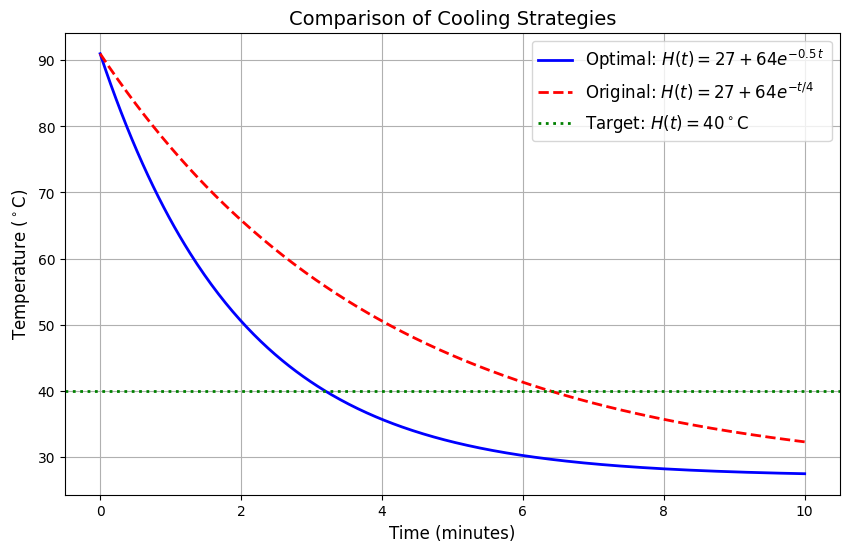

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols and initial parameters.
t = sp.symbols('t')
k_max = 0.5  # Maximum cooling rate (adjust this value as needed)
k_orig = 1/4  # Original cooling rate
H0 = 91  # Initial temperature
H_eq = 27  # Equilibrium (ambient) temperature

# Define the function H(t) for a given cooling rate k:
def H_func(t, k):
    # H(t) = 27 + 64 * exp(-k*t) since 64 = H0 - 27
    return 27 + 64 * np.exp(-k*t)

# Set the desired target temperature.
T_d = 40  # Target temperature in degrees Celsius

# Calculate the minimal time using the optimal control (k_max)
T_min = (1/k_max) * np.log(64/(T_d - 27))
print(f"Optimal cooling time with k_max = {k_max}: {T_min:.2f} minutes")

# For comparison, calculate the time required with the original cooling rate.
T_orig = (1/k_orig) * np.log(64/(T_d - 27))
print(f"Cooling time with original k = {k_orig}: {T_orig:.2f} minutes")

# Generate time values for plotting.
t_vals = np.linspace(0, 10, 400)

# Compute H(t) curves for both strategies.
H_optimal = H_func(t_vals, k_max)
H_original = H_func(t_vals, k_orig)

# Plot the two cooling curves.
plt.figure(figsize=(10, 6))
plt.plot(t_vals, H_optimal, label=r"Optimal: $H(t)=27+64e^{-0.5\,t}$", color='blue', linewidth=2)
plt.plot(t_vals, H_original, label=r"Original: $H(t)=27+64e^{-t/4}$", color='red', linestyle='--', linewidth=2)
plt.axhline(T_d, color='green', linestyle=':', linewidth=2, label=r"Target: $H(t)=40^\circ\mathrm{C}$")
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Temperature ($^\circ$C)", fontsize=12)
plt.title("Comparison of Cooling Strategies", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


#### Summary

- **Optimal Strategy:**  
  Using the maximum cooling rate $k_{\max}$ minimizes the time required to reach a target temperature. The minimal time is given by

  $$
  T_{\min}=\frac{1}{k_{\max}}\ln\left(\frac{64}{T_d-27}\right).
  $$

- **Comparison with Original Cooling:**  
  For example, with $T_d=40^\circ\mathrm{C}$, $k_{\max}=0.5$ yields $T_{\min}\approx3.19$ minutes, while the original cooling rate ($k=0.25$) requires about $6.37$ minutes.

This code demonstrates how adjusting the cooling rate (via optimal control) can significantly reduce the time to reach a desired temperature. 